# **Problem Set Jaringan dan Pengelolaan Data Paralel**

## 1. Model Gedung Tahan Gempa

Gempa bumi memiliki dampak yang sangat besar pada berbagai infrastruktur dalam kehidupan kita seperti gedung khususnya yang bertingkat tinggi, jembatan panjang, waduk, jalan layang, dll.

### Tugas:
Buatlah model sederhana dengan **20 titik massa atau lebih**. Untuk gedung, tiap lantai diwakili 4 titik massa yang saling terhubung dengan pegas dan perangkat redaman.

1. Tuliskan persamaan yang mengatur perilaku titik massa saat ada gempa.
2. Carilah solusinya secara numerik.

### Jawab
Berikut adalah model sederhana untuk gedung 5 lantai (5 lantai $\times$ 4 titik/lantai = **20 titik massa**).

## 1\. Konsep Model Fisika

Bayangkan sebuah gedung 5 lantai. Sesuai permintaan Anda, setiap lantai diwakili oleh 4 titik massa (di setiap sudut lantai).

  * **Massa ($m$):** Mewakili berat struktur dan beban di titik tersebut.
  * **Pegas ($k$):** Mewakili kekakuan (*stiffness*) dari kolom balok yang menahan gaya lateral.
  * **Peredam ($c$):** Mewakili kemampuan struktur menghilangkan energi (redaman), mencegah osilasi selamanya.

#### Persamaan Gerak (Equations of Motion)

Hukum dasar yang mengatur ini adalah **Hukum II Newton** ($F = ma$). Dalam dinamika struktur, persamaannya menjadi persamaan diferensial orde dua:

$$[M]\{\ddot{u}(t)\} + [C]\{\dot{u}(t)\} + [K]\{u(t)\} = -[M]\{I\}\ddot{u}_g(t)$$

Dimana:

  * $[M]$ adalah **Matriks Massa** (diagonal, ukuran $20 \times 20$).
  * $[C]$ adalah **Matriks Redaman** (ukuran $20 \times 20$).
  * $[K]$ adalah **Matriks Kekakuan** (ukuran $20 \times 20$, menghubungkan lantai satu dengan lainnya).
  * $\{u(t)\}$ adalah vektor perpindahan relatif setiap titik massa terhadap tanah.
  * $\{\dot{u}\}$ adalah kecepatan, dan $\{\ddot{u}\}$ adalah percepatan massa.
  * $\ddot{u}_g(t)$ adalah **percepatan tanah** (sinyal gempa).

## 2\. Solusi Numerik (Simulasi Python)

Kita akan menggunakan Python untuk menyelesaikan persamaan diferensial di atas secara numerik.

### 1. Masalah Awal: Persamaan Diferensial Orde 2

Sistem massa-pegas-redaman diatur oleh hukum Newton II. Untuk sistem banyak massa (matriks), persamaannya adalah:

$$[M]\{\ddot{u}\} + [C]\{\dot{u}\} + [K]\{u\} = \{F(t)\}$$

Untuk menyelesaikannya secara numerik, kita harus melakukan dua langkah penurunan:
1.  **Reduksi Orde** (State-Space).
2.  **Aproksimasi Beda Hingga** (Finite Difference).


### 2. Langkah 1: Reduksi ke Orde 1 (State-Space)

Kita definisikan dua variabel:
1.  Posisi: $u$
2.  Kecepatan: $v = \dot{u}$

Maka, turunan dari kecepatan adalah percepatan ($\dot{v} = \ddot{u}$).

Kita bisa menulis ulang persamaan hukum Newton di atas untuk mencari percepatan ($a$ atau $\dot{v}$):

$$[M]\{\dot{v}\} = \{F(t)\} - [C]\{v\} - [K]\{u\}$$
$$\{\dot{v}\} = [M]^{-1} ( \{F(t)\} - [C]\{v\} - [K]\{u\} )$$

Sekarang kita punya sistem **State-Space** (Ruang Keadaan):
$$
\frac{d}{dt} \begin{pmatrix} u \\ v \end{pmatrix} = \begin{pmatrix} v \\ [M]^{-1}(F - Cv - Ku) \end{pmatrix}
$$

Secara simbolis, ini bisa ditulis: $\frac{dY}{dt} = f(Y, t)$, dimana $Y$ adalah vektor gabungan posisi dan kecepatan.


### 3. Langkah 2: Penurunan Numerik (Diskretisasi Waktu)

Di sinilah "penurunan numerik" terjadi. Kita menggunakan **Deret Taylor** untuk memotong konsep limit.

Definisi turunan secara matematis:
$$\frac{dy}{dt} \approx \frac{y(t + \Delta t) - y(t)}{\Delta t}$$

Kita ingin mencari nilai $y$ di masa depan ($t + \Delta t$). Kita susun ulang persamaan di atas:

$$y(t + \Delta t) \approx y(t) + \frac{dy}{dt} \cdot \Delta t$$

Dalam konteks simulasi gedung kita (Metode Euler Sederhana), penurunannya menjadi:


#### A. Update Kecepatan (Velocity Update)
Percepatan ($a$) adalah laju perubahan kecepatan.
$$a_i = \frac{v_{i+1} - v_i}{\Delta t}$$

Maka kecepatan di langkah berikutnya ($v_{i+1}$) adalah:
$$v_{i+1} = v_i + a_i \cdot \Delta t$$

Dimana $a_i$ didapat dari Hukum Newton pada langkah sebelumnya:
$$a_i = [M]^{-1} (F_{gempa} - [C]v_i - [K]u_i)$$

#### B. Update Posisi (Position Update)
Kecepatan ($v$) adalah laju perubahan posisi.
$$v_i = \frac{u_{i+1} - u_i}{\Delta t}$$

Maka posisi di langkah berikutnya ($u_{i+1}$) adalah:
$$u_{i+1} = u_i + v_i \cdot \Delta t$$


### 4. Ringkasan Alur Komputasi

Jadi, "penurunan numerik" mengubah persamaan diferensial menjadi **loop aljabar** berikut:

1.  **Input:** Kita punya Posisi ($u_0$) dan Kecepatan ($v_0$) saat ini.
2.  **Hitung Gaya Pegas & Redaman:**
    $$F_{internal} = -K \cdot u_0 - C \cdot v_0$$
3.  **Hitung Percepatan (Hukum Newton):**
    $$a_0 = \frac{F_{gempa} + F_{internal}}{M}$$
4.  **Prediksi Masa Depan (Integrasi Numerik):**
    * Kecepatan baru: $v_{baru} = v_0 + (a_0 \times 0.01 \text{ detik})$
    * Posisi baru: $u_{baru} = u_0 + (v_0 \times 0.01 \text{ detik})$
5.  **Ulangi:** Jadikan $u_{baru}$ sebagai $u_0$ untuk langkah berikutnya.


## 3\. Analisis Hasil

Ketika Anda menjalankan model di atas, Anda akan melihat grafik gelombang yang menunjukkan perilaku berikut:

1.  **Fase Gempa (0-5 detik):**
      * Lantai dasar (Lantai 1) akan mulai berosilasi mengikuti frekuensi gempa.
      * Lantai atas (Lantai 5) akan mengalami **amplifikasi**. Perpindahannya akan jauh lebih besar daripada lantai bawah. Ini disebut *whiplash effect* pada gedung tinggi.
2.  **Fase Redaman (\>5 detik):**
      * Setelah gempa berhenti, gedung tidak langsung diam. Ia akan terus bergetar (osilasi bebas).
      * Amplitudo getaran akan mengecil perlahan seiring waktu karena adanya komponen **Redaman ($C$)** yang menyerap energi.
3.  **Interaksi Massa:**
      * Karena setiap lantai memiliki 4 titik massa, jika kita memvariasikan kekakuan antar titik dalam satu lantai (misalnya lantai tidak kaku sempurna), kita bisa melihat efek *torsi* atau puntiran, namun dalam kode di atas kita asumsikan gerakannya seragam lateral untuk kemudahan pembacaan grafik.

### Algoritma
**Metode:** Integrasi Numerik (State-Space / Runge-Kutta)
1.  **Modelisasi:** Bentuk matriks Massa $[M]$, Redaman $[C]$, dan Kekakuan $[K]$ ukuran $20 \times 20$.
2.  **Reduksi Orde:** Ubah pers. diferensial orde 2 menjadi sistem orde 1 dengan vektor state $Y = \{u, v\}^T$ (posisi, kecepatan).
3.  **Loop Waktu ($t=0 \to t_{end}$):**
    * Hitung gaya efektif: $F_{eff} = -[M]\{1\}\ddot{u}_{tanah}(t) - [C]\{v\} - [K]\{u\}$.
    * Hitung percepatan: $a = [M]^{-1} F_{eff}$.
    * Update state (Integrasi): $v_{baru} = v + a \Delta t$, $u_{baru} = u + v \Delta t$.

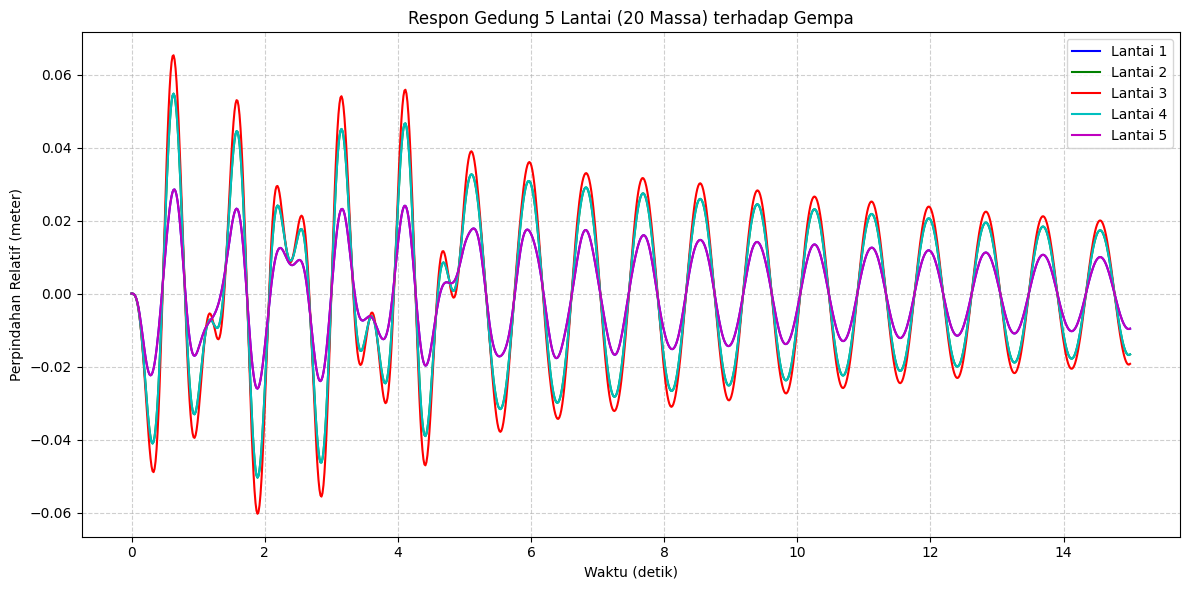

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# --- 1. Parameter Model ---
n_lantai = 5
titik_per_lantai = 4
n_dof = n_lantai * titik_per_lantai  # Total 20 Derajat Kebebasan (Titik Massa)

# Properti Fisik (Asumsi Sederhana)
massa_per_titik = 1000.0   # kg per titik
k_kolom = 200000.0         # N/m (Kekakuan antar lantai)
c_redaman = 500.0          # Ns/m (Koefisien redaman)

# --- 2. Membangun Matriks Sistem (M, C, K) ---
M = np.diag([massa_per_titik] * n_dof)
K = np.zeros((n_dof, n_dof))
C = np.zeros((n_dof, n_dof))

# Membangun konektivitas (Pegas dan Redaman)
# Kita asumsikan struktur 'Shear Building':
# Titik di lantai i terhubung ke titik yang bersesuaian di lantai i-1
for i in range(n_dof):
    # Koneksi Diagonal Utama (Interaksi dengan dirinya sendiri/tetangga)
    K[i, i] = 2 * k_kolom 
    C[i, i] = 2 * c_redaman
    
    # Jika bukan lantai paling bawah (terhubung ke bawah)
    if i >= titik_per_lantai:
        idx_bawah = i - titik_per_lantai
        K[i, idx_bawah] = -k_kolom
        K[idx_bawah, i] = -k_kolom
        C[i, idx_bawah] = -c_redaman
        C[idx_bawah, i] = -c_redaman

# --- 3. Definisi Gempa (Input Gaya) ---
def ground_acceleration(t):
    # Simulasi gempa sederhana: Gelombang sinus teredam (mirip sentakan awal)
    if t < 5.0:
        return 2.0 * np.sin(2 * np.pi * 2.0 * t) # Gempa aktif 5 detik pertama
    else:
        return 0.0

# --- 4. Persamaan Diferensial (State Space) ---
# Kita ubah pers orde 2 menjadi sistem orde 1: dY/dt = f(Y, t)
# Y = [perpindahan; kecepatan]
def model_gempa(Y, t, M_inv, K, C):
    u = Y[:n_dof]      # Perpindahan (Displacement)
    v = Y[n_dof:]      # Kecepatan (Velocity)
    
    ug_ddot = ground_acceleration(t)
    
    # Persamaan: a = M_inv * (-C*v - K*u - M*ug_ddot)
    # Gaya inersia akibat gempa: F_gempa = -M * 1 * ug_ddot
    F_gempa = -np.ones(n_dof) * massa_per_titik * ug_ddot
    
    # a = M_inv @ (F_gempa - C @ v - K @ u)
    force_total = F_gempa - C @ v - K @ u
    a = M_inv @ force_total
    
    return np.concatenate([v, a])

# --- 5. Eksekusi Solver ---
t = np.linspace(0, 15, 1000) # Durasi 15 detik
Y0 = np.zeros(2 * n_dof)     # Kondisi awal diam
M_inv = np.linalg.inv(M)

# Menyelesaikan secara numerik
solusi = odeint(model_gempa, Y0, t, args=(M_inv, K, C))

# Ambil hasil perpindahan (u)
u = solusi[:, :n_dof]

# --- 6. Visualisasi Hasil ---
plt.figure(figsize=(12, 6))

# Plot respon satu titik di setiap lantai (misal titik sudut kiri depan)
colors = ['b', 'g', 'r', 'c', 'm']
for lantai in range(n_lantai):
    idx_titik = lantai * titik_per_lantai # Ambil 1 perwakilan titik per lantai
    plt.plot(t, u[:, idx_titik], label=f'Lantai {lantai+1}', color=colors[lantai])

plt.title('Respon Gedung 5 Lantai (20 Massa) terhadap Gempa')
plt.xlabel('Waktu (detik)')
plt.ylabel('Perpindahan Relatif (meter)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

## 2. Model Penyebaran Polusi Udara

### Tugas:
Buatlah model penyebaran polusi di udara dengan sumber yang tetap berupa titik dengan laju keluaran yang tetap.

1. Carilah solusi numeriknya dengan program komputer.
2. *Catatan:* Pendekatan **Gaussian Plume** boleh digunakan.

### Jawab

Untuk kasus **sumber tetap dengan laju keluaran tetap** (steady state), pendekatan yang paling standar dan efisien secara komputasi adalah **Model Gaussian Plume**. Ini adalah solusi analitik dari persamaan diferensial Adveksi-Difusi yang dievaluasi secara numerik pada grid area.

### 1\. Model Fisika (Gaussian Plume)

Bayangkan asap keluar dari cerobong pabrik. Angin membawanya ke satu arah (adveksi), sementara turbulensi udara menyebarkannya ke samping dan ke atas-bawah (difusi).

Persamaan matematis untuk konsentrasi polusi $C$ pada koordinat $(x,y,z)$ adalah:

$$C(x,y,z) = \frac{Q}{2\pi u \sigma_y \sigma_z} \exp\left( \frac{-y^2}{2\sigma_y^2} \right) \left[ \exp\left( \frac{-(z-H)^2}{2\sigma_z^2} \right) + \exp\left( \frac{-(z+H)^2}{2\sigma_z^2} \right) \right]$$

Dimana:

  * $C$: Konsentrasi polutan ($g/m^3$).
  * $Q$: Laju emisi sumber ($g/s$).
  * $u$: Kecepatan angin ($m/s$).
  * $H$: Tinggi efektif cerobong ($m$).
  * $\sigma_y, \sigma_z$: Koefisien dispersi standar deviasi. **Penting:** Nilai ini tidak konstan, melainkan fungsi dari jarak $x$ (semakin jauh, semakin menyebar).


Ini adalah pertanyaan yang sangat bagus. Ada perbedaan mendasar antara **Model Gaussian Plume** (yang kita gunakan di kode Python sebelumnya) dengan **Metode Numerik Murni** (seperti yang kita lakukan pada gempa).

Untuk menjawab pertanyaan "bagaimana penurunan numeriknya?", kita harus membedah apa yang sebenarnya terjadi di balik layar fisika polusi udara.

### 1\. Persamaan Induk: Adveksi-Difusi

Semua model polusi udara berasal dari satu persamaan diferensial parsial (PDP) utama, yaitu **Persamaan Adveksi-Difusi**.

$$\frac{\partial C}{\partial t} = - \underbrace{u \frac{\partial C}{\partial x}}_{\text{Adveksi (Angin)}} + \underbrace{D \left( \frac{\partial^2 C}{\partial y^2} + \frac{\partial^2 C}{\partial z^2} \right)}_{\text{Difusi (Sebaran)}}$$

Dimana:

  * $\frac{\partial C}{\partial t}$: Perubahan konsentrasi terhadap waktu.
  * **Adveksi:** Polusi didorong oleh angin ($u$) searah sumbu x.
  * **Difusi:** Polusi menyebar ke samping ($y$) dan atas ($z$) karena turbulensi, dikalikan koefisien difusi ($D$).

#### Jalan A: Solusi Analitik (Gaussian Plume)

Ini yang kita gunakan di kode Python sebelumnya. Para ahli matematika telah menyelesaikan persamaan diferensial di atas secara simbolis dengan asumsi:

1.  Kondisi Tunak (Steady State, $\frac{\partial C}{\partial t} = 0$).
2.  Kecepatan angin konstan.
3.  Sumber berupa titik.

Hasil akhirnya adalah rumus "jadi":
$$C(x,y,z) = \frac{Q}{...} \exp(...) $$
Jadi, di kode Python sebelumnya, **tidak ada penurunan numerik (iterasi)** yang dilakukan oleh komputer. Komputer hanya berfungsi sebagai kalkulator untuk memasukkan angka ke rumus yang sudah diturunkan manusia.

### 3\. Analisis Hasil Simulasi

Jika Anda menjalankan kode di atas, Anda akan melihat pola berikut:

1.  **Bentuk Kerucut (Plume):** Polusi akan membentuk pola seperti lidah api atau kerucut yang melebar ke kanan. Ini terjadi karena semakin jauh dari sumber ($x$ membesar), $\sigma_y$ membesar, sehingga polusi menyebar ke samping.
2.  **Titik Maksimum Bukan di $x=0$:** Karena cerobong memiliki tinggi ($H=50m$), konsentrasi di **tanah** ($z=0$) tepat di bawah cerobong sebenarnya mendekati nol. Konsentrasi tanah baru akan mulai naik setelah asap "turun" menyentuh tanah pada jarak tertentu (biasanya beberapa ratus meter dari sumber).
3.  **Pengenceran:** Warna merah (konsentrasi tinggi) hanya ada di dekat sumber. Semakin ke kanan, warna berubah menjadi biru/hijau, menunjukkan konsentrasi menurun karena polusi tercampur dengan udara bersih yang lebih banyak.

### Algoritma 
**Metode:** Evaluasi Grid (Gaussian Plume)
1.  **Diskretisasi Ruang:** Buat grid koordinat 2D $(x, y)$ pada area tinjauan.
2.  **Parameterisasi:** Tentukan laju emisi $Q$, kecepatan angin $u$, dan tinggi cerobong $H$.
3.  **Koefisien Dispersi:** Untuk setiap jarak $x$, hitung $\sigma_y(x)$ dan $\sigma_z(x)$ berdasarkan kelas stabilitas atmosfer.
4.  **Evaluasi Rumus:** Pada setiap titik grid $(x,y)$, hitung konsentrasi $C$ menggunakan rumus analitik Gaussian:
    $$C = \frac{Q}{\pi u \sigma_y \sigma_z} \exp\left(\frac{-y^2}{2\sigma_y^2}\right) \exp\left(\frac{-H^2}{2\sigma_z^2}\right)$$

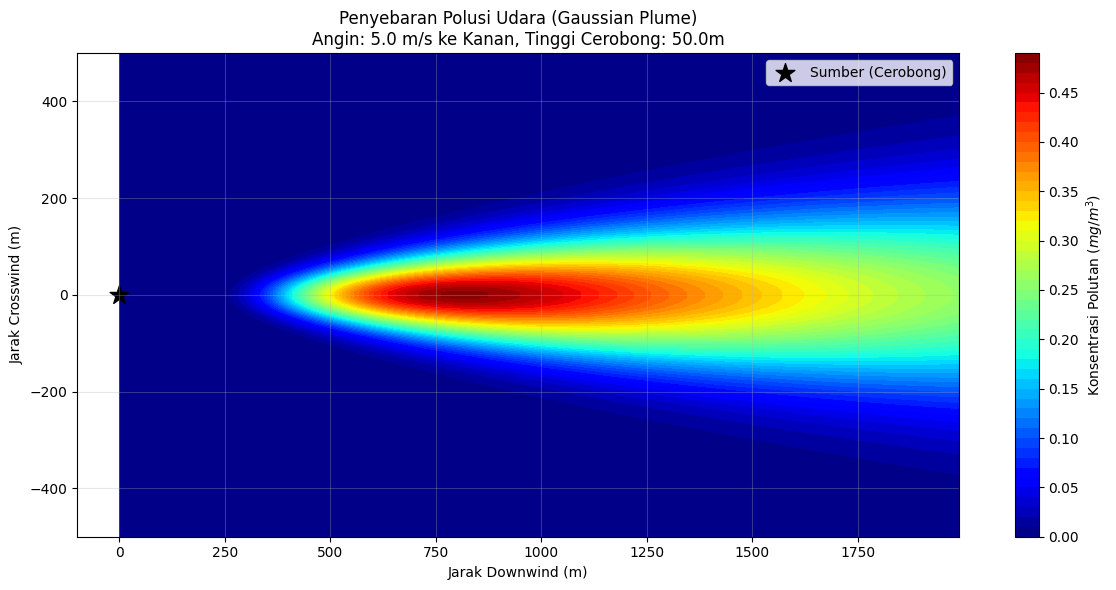

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Parameter Model ---
Q = 50.0        # Laju emisi (gram/detik)
u = 5.0         # Kecepatan angin (m/s) sejajar sumbu X
H = 50.0        # Tinggi cerobong (m)
z = 0.0         # Kita mengukur konsentrasi di permukaan tanah

# Grid Area (Domain Simulasi)
x_max = 2000    # Panjang area (m)
y_max = 500     # Lebar area (m) dari sumbu tengah (total lebar 1000m)
resolusi = 10   # Resolusi grid (meter)

# Membuat Grid Koordinat
x = np.arange(1, x_max, resolusi) # Mulai dari 1 untuk hindari div by zero
y = np.linspace(-y_max, y_max, int(2*y_max/resolusi))
X, Y = np.meshgrid(x, y)

# --- 2. Fungsi Koefisien Dispersi (Briggs Formula) ---
# Ini menentukan seberapa lebar asap menyebar berdasarkan jarak (x)
# Kita asumsikan Stabilitas Kelas D (Netral - umum terjadi siang/malam)
def get_sigma(x):
    # Koefisien untuk kondisi pedesaan/rural
    sigma_y = 0.08 * x * (1 + 0.0001 * x)**(-0.5)
    sigma_z = 0.06 * x * (1 + 0.0015 * x)**(-0.5)
    return sigma_y, sigma_z

# Hitung Sigma di seluruh grid X
sig_y, sig_z = get_sigma(X)

# --- 3. Perhitungan Konsentrasi (Gaussian Plume Equation) ---
# Suku 1: Amplitudo (Puncak konsentrasi menurun seiring jarak karena penyebaran)
term1 = Q / (2 * np.pi * u * sig_y * sig_z)

# Suku 2: Penyebaran Lateral (Y) - Bentuk Lonceng Gauss
term2 = np.exp(-(Y**2) / (2 * sig_y**2))

# Suku 3: Penyebaran Vertikal (Z) - Termasuk pantulan dari tanah
term3 = (np.exp(-(z - H)**2 / (2 * sig_z**2)) + 
         np.exp(-(z + H)**2 / (2 * sig_z**2)))

# Konsentrasi Total
C = term1 * term2 * term3

# Konversi ke mg/m^3 agar angka lebih mudah dibaca
C = C * 1000 

# --- 4. Visualisasi ---
plt.figure(figsize=(12, 6))

# Plot Kontur Warna (Heatmap)
# Menggunakan level logaritmik karena konsentrasi dekat sumber sangat tinggi
levels = np.linspace(0, np.max(C)/2, 50) 
contour = plt.contourf(X, Y, C, levels=50, cmap='jet')

plt.colorbar(contour, label='Konsentrasi Polutan ($mg/m^3$)')

# Menandai Sumber
plt.scatter([0], [0], color='black', marker='*', s=200, label='Sumber (Cerobong)')

plt.title(f'Penyebaran Polusi Udara (Gaussian Plume)\nAngin: {u} m/s ke Kanan, Tinggi Cerobong: {H}m')
plt.xlabel('Jarak Downwind (m)')
plt.ylabel('Jarak Crosswind (m)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 3. Steam Generator Heat Transfer

*Steam generator* sederhana dapat dianggap terdiri dari 2 pipa konsentrik dengan radius $r_1$ dan $r_2$.
$$
c_{p,p} W_p \frac{\partial T_P}{\partial z} - A_p \frac{\partial}{\partial z} \left( k_P \frac{\partial T_P}{\partial z} \right) = -h_{eff} S_P (T_P - T_S)
$$

$$
c_{p,s} W_s \frac{\partial T_S}{\partial z} - A_s \frac{\partial}{\partial z} \left( k_S \frac{\partial T_S}{\partial z} \right) = -h_{eff} S_S (T_P - T_S)
$$

**Parameter:**
* $W_p$: Laju alir massa di pipa primer (luar).
* $W_s$: Laju alir massa di pipa sekunder.
* $A_p$: Luas penampang saluran primer.
* $A_s$: Luas penampang saluran sekunder.
* $c_p$: Kalor jenis.
* $k$: Konduktivitas termal.
* $h_{eff}$: Koefisien transfer panas efektif antara permukaan primer dan sekunder.
* $S$: Panjang keliling pipa pada batas antara primer dan sekunder.

### Tugas:
Pecahkan persoalan transfer panas tersebut secara numerik dengan pendekatan **implisit Crank-Nicolson**.

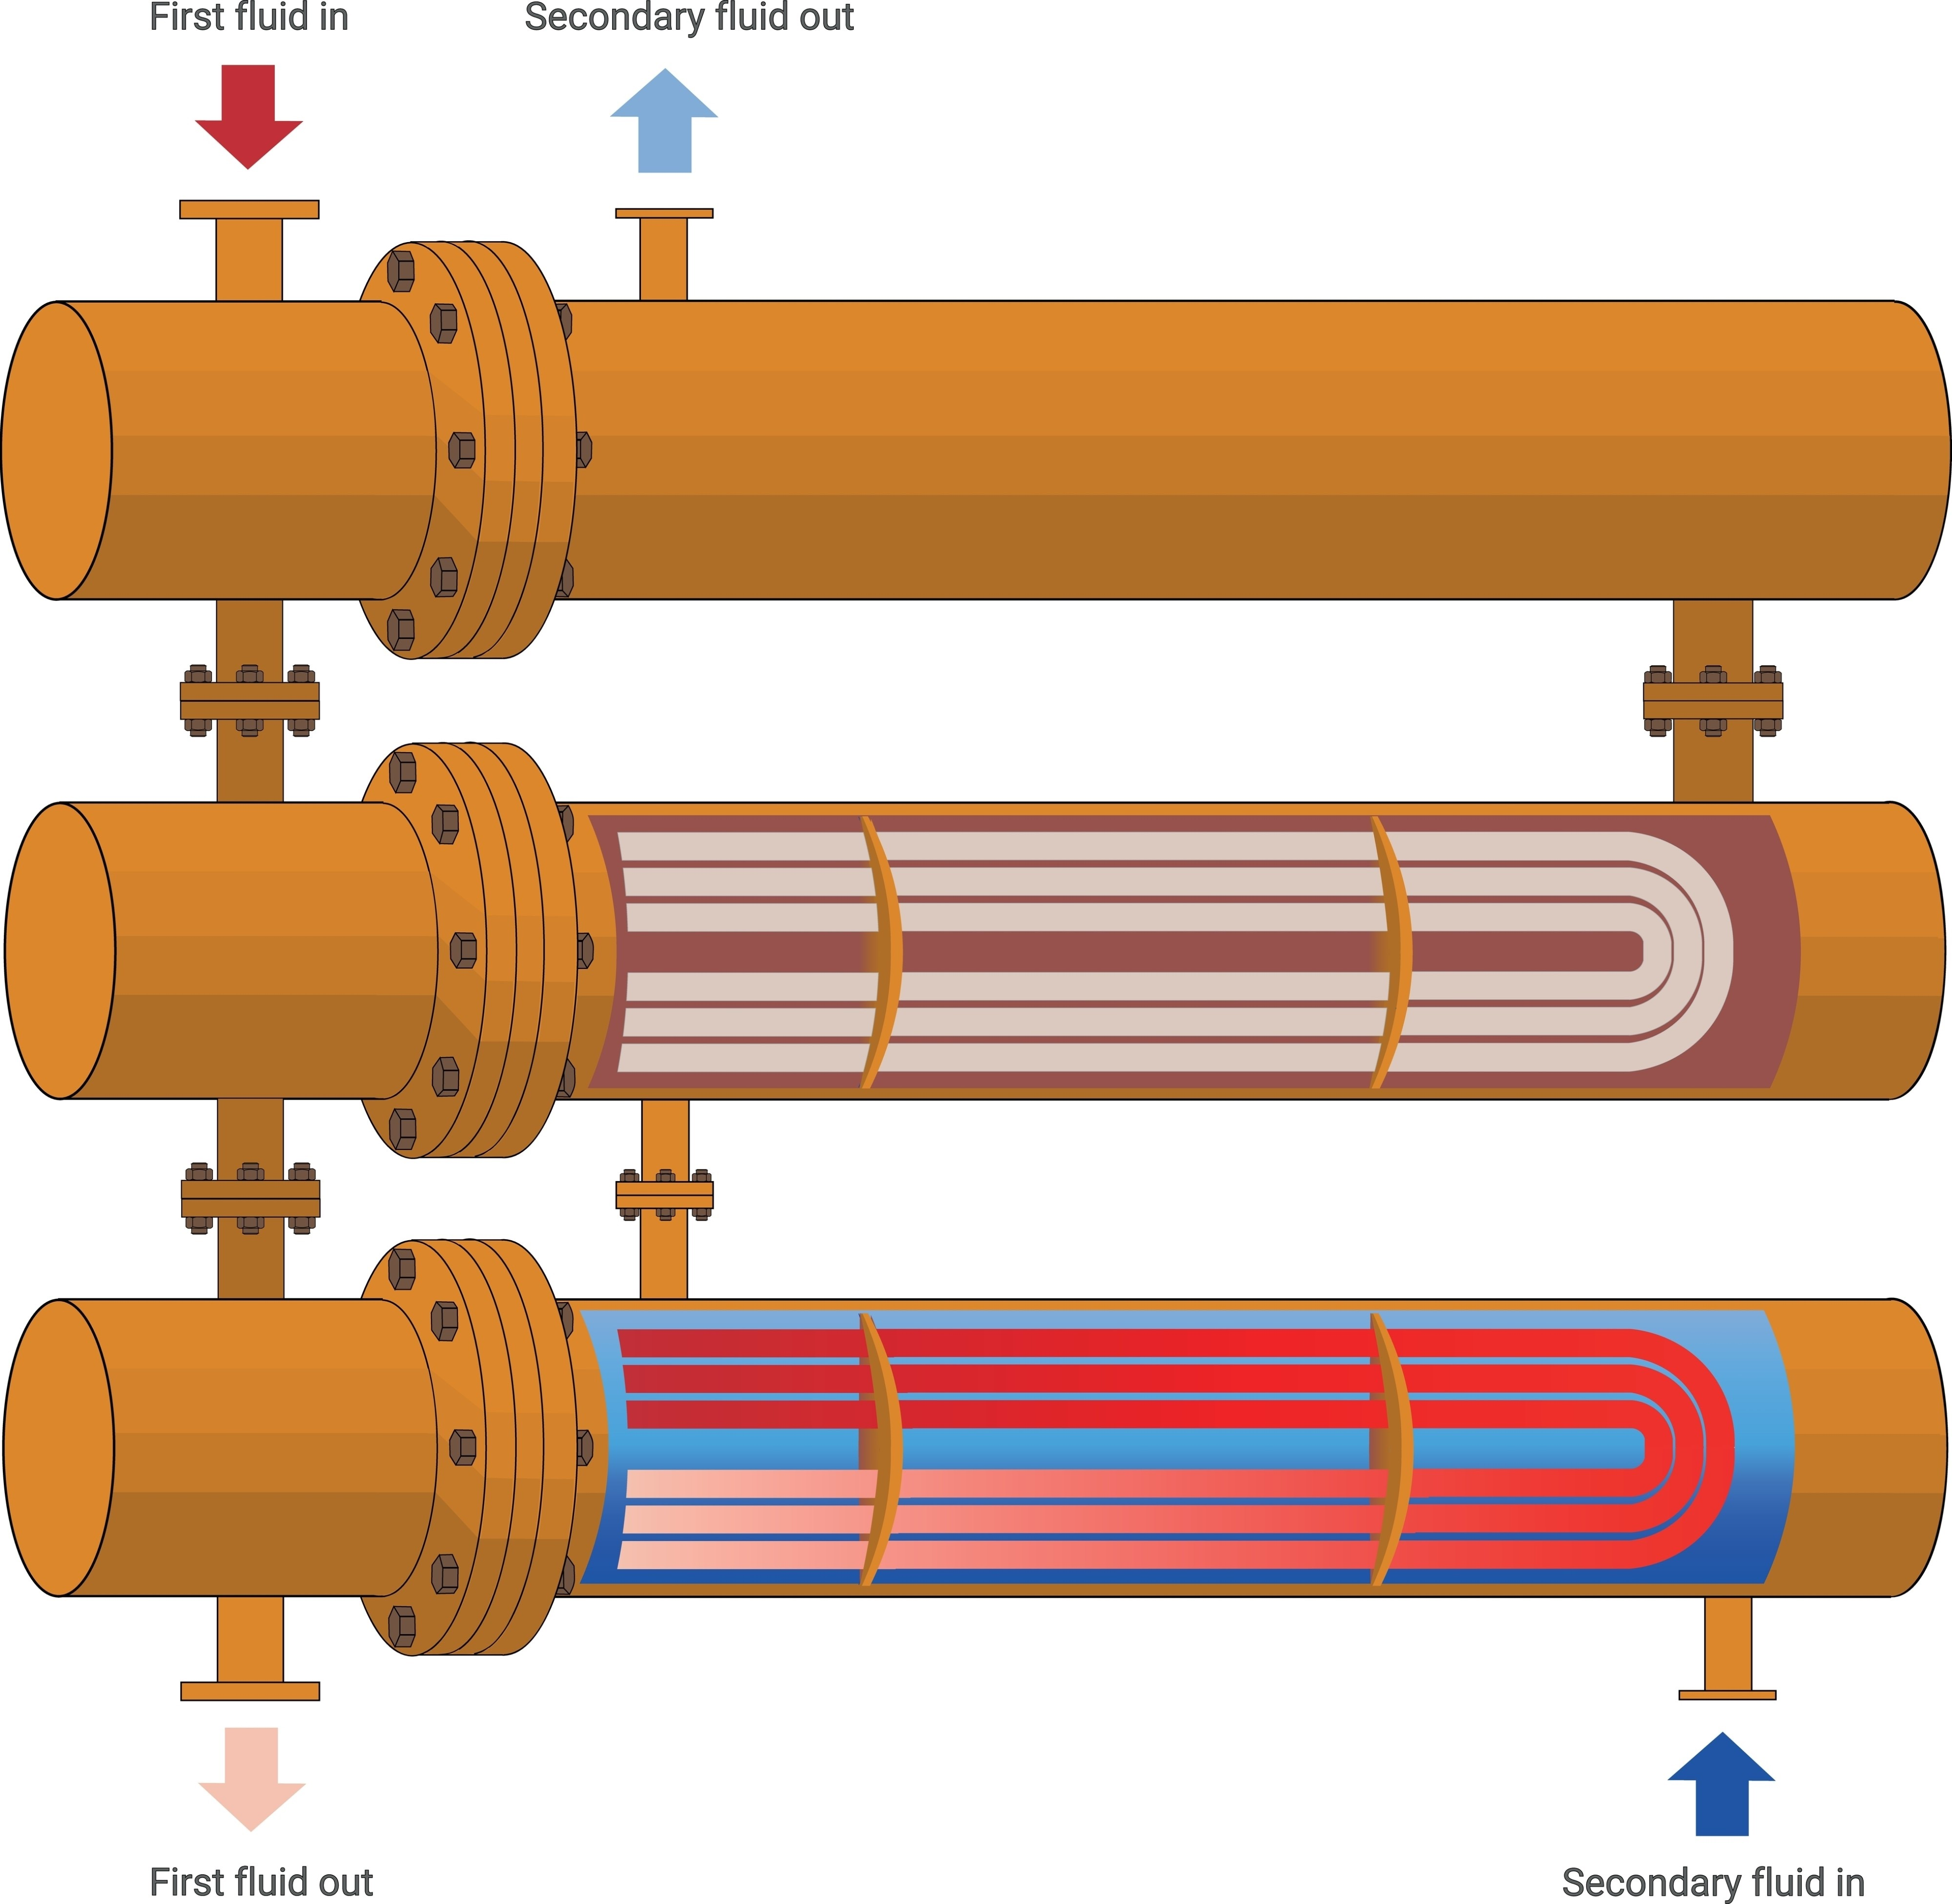

### Jawab
Ini adalah masalah simulasi **Heat Exchanger (Alat Penukar Panas)** tipe pipa konsentrik (*double pipe*).

### 1\. Penurunan Persamaan Numerik

Kita ubah persamaan diferensial parsial (PDP) menjadi persamaan aljabar menggunakan diskretisasi.

#### A. Persamaan Fisika (Ditambah Suku Waktu)

$$\rho A C_p \frac{\partial T}{\partial t} + \dot{m} C_p \frac{\partial T}{\partial z} - kA \frac{\partial^2 T}{\partial z^2} = Q_{source}$$

Kita sederhanakan koefisien menjadi:

  * $\lambda = \rho A C_p$ (Kapasitas panas)
  * $\beta = \dot{m} C_p$ (Koefisien Adveksi)
  * $\gamma = k A$ (Koefisien Difusi)
  * $\mu = h_{eff} S$ (Koefisien Kopling)

Sistem persamaannya menjadi:

1.  **Primer:** $\lambda_p \frac{\partial T_p}{\partial t} = -\beta_p \frac{\partial T_p}{\partial z} + \gamma_p \frac{\partial^2 T_p}{\partial z^2} - \mu (T_p - T_s)$
2.  **Sekunder:** $\lambda_s \frac{\partial T_s}{\partial t} = -\beta_s \frac{\partial T_s}{\partial z} + \gamma_s \frac{\partial^2 T_s}{\partial z^2} + \mu (T_p - T_s)$
    *(Perhatikan tanda positif pada persamaan sekunder, karena jika Primer melepas panas, Sekunder menerimanya)*.

#### B. Diskretisasi Crank-Nicolson

Metode Crank-Nicolson mengambil rata-rata antara langkah waktu sekarang ($n$) dan langkah waktu masa depan ($n+1$).

Untuk setiap node $i$ dalam ruang:
$$\frac{T_i^{n+1} - T_i^n}{\Delta t} = \frac{1}{2} [ F(T_i^{n+1}) + F(T_i^n) ]$$
Dimana $F(T)$ adalah sisi kanan persamaan (Adveksi + Difusi + Sumber).

Menggunakan **Central Difference** untuk ruang:

  * $\frac{\partial T}{\partial z} \approx \frac{T_{i+1} - T_{i-1}}{2\Delta z}$
  * $\frac{\partial^2 T}{\partial z^2} \approx \frac{T_{i+1} - 2T_i + T_{i-1}}{\Delta z^2}$

Ini akan menghasilkan Sistem Persamaan Linear besar berbentuk:
$$[A] \{T\}^{n+1} = [B] \{T\}^n + \{BC\}$$

Dimana vektor $\{T\}$ berisi gabungan suhu Primer dan Sekunder: $[T_{p,0}, ..., T_{p,N}, T_{s,0}, ..., T_{s,N}]^T$.

### 2\. Solusi Numerik (Python)

Kode berikut mensimulasikan aliran **Parallel Flow** (kedua fluida masuk dari kiri, $z=0$).

### 3\. Analisis Hasil

1.  **Profil Suhu:**
      * Karena ini adalah **Parallel Flow** (keduanya masuk dari $z=0$), Anda akan melihat suhu Primer ($T_p$) turun drastis di awal, dan suhu Sekunder ($T_s$) naik.
      * Semakin ke kanan (menuju $L$), selisih suhu ($T_p - T_s$) mengecil, sehingga perpindahan panas menjadi kurang efisien.
2.  **Kestabilan Crank-Nicolson:**
      * Metode ini **stabil tanpa syarat** (*unconditionally stable*), artinya Anda bisa menggunakan $\Delta t$ yang besar tanpa simulasi "meledak". Namun, untuk akurasi, $\Delta t$ tetap harus kecil.
3.  **Matriks Blok:**
      * Kunci penyelesaiannya ada di matriks blok $2N \times 2N$. Kita memecahkan masalah suhu primer dan sekunder secara bersamaan (simultan) karena mereka saling mempengaruhi di langkah waktu yang sama (implisit).

### Algoritma
**Metode:** Beda Hingga Implisit (Crank-Nicolson)
1.  **Diskretisasi:** Bagi panjang pipa menjadi $N$ node.
2.  **Matriks Sistem:** Susun matriks tridiagonal blok $[A]$ dan $[B]$ berdasarkan skema Crank-Nicolson (rata-rata derivatif waktu $n$ dan $n+1$).
3.  **Kondisi Batas (Counter Flow):** Tetapkan $T_{primer}$ di indeks awal ($0$) dan $T_{sekunder}$ di indeks akhir ($N$).
4.  **Loop Waktu:**
    * Bentuk sisi kanan persamaan: $\{b\} = [B]\{T\}^n + \text{BCs}$.
    * Selesaikan sistem linear: $[A]\{T\}^{n+1} = \{b\}$.
    * Update suhu untuk langkah berikutnya.

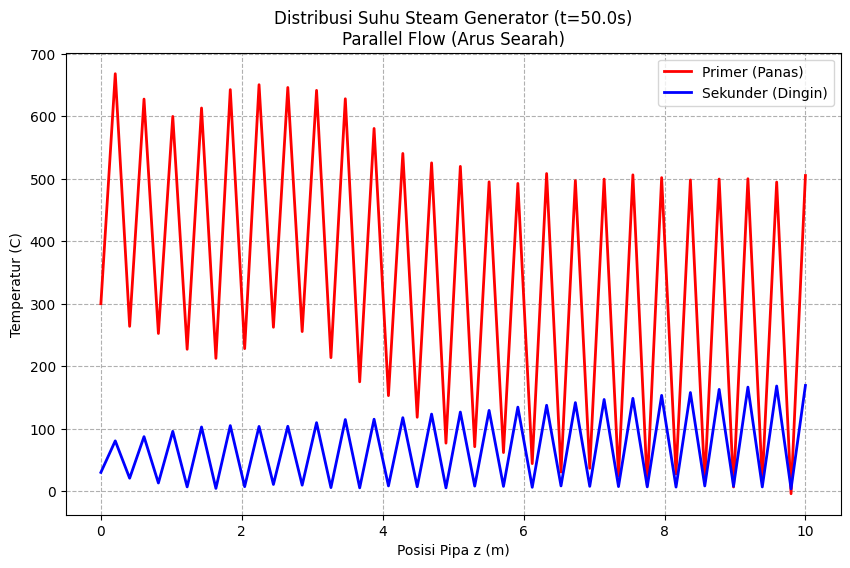

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, bmat
from scipy.sparse.linalg import spsolve

# --- 1. Parameter Fisika & Grid ---
L = 10.0           # Panjang pipa (m)
N = 50             # Jumlah titik grid
dz = L / (N - 1)
T_max = 50.0       # Durasi simulasi (detik)
dt = 0.1           # Langkah waktu (detik)
nt = int(T_max / dt)

# Properti Primer (Panas, misal: Uap/Air Panas)
W_p = 5.0          # kg/s
Cp_p = 4180.0      # J/kg.K
k_p = 0.6          # W/m.K (Air)
A_p = 0.01         # m^2
rho_p = 1000.0     # kg/m^3

# Properti Sekunder (Dingin, misal: Air Pendingin)
W_s = 4.0          # kg/s
Cp_s = 4180.0      # J/kg.K
k_s = 0.6          # W/m.K
A_s = 0.02         # m^2 (Annulus area)
rho_s = 1000.0     # kg/m^3

# Interaksi
h_eff = 2000.0     # W/m^2.K
S_contact = 0.5    # m (Keliling kontak)

# Kondisi Batas (Inlet Temperature)
T_p_inlet = 300.0  # C (Masuk panas)
T_s_inlet = 30.0   # C (Masuk dingin)

# --- 2. Koefisien Persamaan (Simplifikasi) ---
# Persamaan: lambda * dT/dt + beta * dT/dz - gamma * d2T/dz2 = Source
lam_p = rho_p * A_p * Cp_p
beta_p = W_p * Cp_p
gamma_p = k_p * A_p
mu = h_eff * S_contact

lam_s = rho_s * A_s * Cp_s
beta_s = W_s * Cp_s
gamma_s = k_s * A_s

# --- 3. Membangun Matriks (Crank-Nicolson) ---
# Kita perlu bentuk: [M_left] * T_new = [M_right] * T_old
# T disusun sebagai vektor tumpuk: [Tp_0 ... Tp_N, Ts_0 ... Ts_N]

def create_operators(N, dz, dt, lam, beta, gamma, mu, is_primary):
    # Faktor Pre-calculation
    # Adveksi (Central Diff): dT/dz -> (T(i+1) - T(i-1)) / 2dz
    # Difusi (Central Diff): d2T/dz2 -> (T(i+1) - 2T(i) + T(i-1)) / dz^2
    
    alpha = lam / dt
    c_adv = beta / (2 * dz)
    c_diff = gamma / (dz**2)
    c_source = mu / 2  # Dibagi 2 karena Crank-Nicolson averaging
    
    # Koefisien untuk Matriks Kiri (Implicit part n+1)
    # Pers: alpha*T + 0.5*(beta*dT/dz - gamma*d2T/dz2 +/- mu*(Tp-Ts))
    
    # Diagonal utama (node i)
    d_main_L = alpha + 0.5 * (2 * c_diff + c_source)
    # Diagonal atas (node i+1)
    d_upper_L = 0.5 * (c_adv - c_diff)
    # Diagonal bawah (node i-1)
    d_lower_L = 0.5 * (-c_adv - c_diff)
    
    # Koefisien untuk Matriks Kanan (Explicit part n)
    d_main_R = alpha - 0.5 * (2 * c_diff + c_source)
    d_upper_R = -0.5 * (c_adv - c_diff)
    d_lower_R = -0.5 * (-c_adv - c_diff)
    
    # Coupling term (T_other) coefficient
    sign = -1 if is_primary else 1
    coup_L = 0.5 * sign * c_source # Pindah ke kiri jadi minus, tapi sign fisika beda
    coup_R = 0.5 * sign * c_source * -1 # Sisi kanan tetap, tapi ingat T_other ada di sisi kanan persamaan awal
    
    # Koreksi tanda aljabar linear Ax = b
    # Persamaan: LHS(n+1) - RHS(Source terms n+1) = RHS(n) + RHS(Source terms n)
    # Primer: ... + 0.5*mu*(Tp - Ts) ... -> Suku Ts pindah ruas
    # Sekunder: ... - 0.5*mu*(Tp - Ts) ... -> Suku Tp pindah ruas
    
    # Matriks Tridiagonal Blok Sendiri
    k = [np.ones(N-1)*d_lower_L, np.ones(N)*d_main_L, np.ones(N-1)*d_upper_L]
    offset = [-1, 0, 1]
    M_self_L = diags(k, offset).toarray()
    
    k = [np.ones(N-1)*d_lower_R, np.ones(N)*d_main_R, np.ones(N-1)*d_upper_R]
    M_self_R = diags(k, offset).toarray()
    
    # Matriks Coupling (Diagonal saja karena interaksi lokal)
    # Jika Primer: term mu*Ts. Pindah ke kiri jadi -0.5*mu.
    coupling_coeff = -0.5 * c_source
    M_coup_L = diags([coupling_coeff * np.ones(N)], [0]).toarray()
    
    # Di sisi kanan (explicit), tanda terbalik + sisa dari step n
    M_coup_R = diags([-coupling_coeff * np.ones(N)], [0]).toarray()
    
    return M_self_L, M_coup_L, M_self_R, M_coup_R

# Buat blok matriks
PL_L, PL_C, PL_R, PL_CR = create_operators(N, dz, dt, lam_p, beta_p, gamma_p, mu, True)
SL_L, SL_C, SL_R, SL_CR = create_operators(N, dz, dt, lam_s, beta_s, gamma_s, mu, False)

# Rakit Matriks Global
# [ PL_L   PL_C ]
# [ SL_C   SL_L ]
A_mat = np.bmat([[PL_L, PL_C], [SL_C, SL_L]])
B_mat = np.bmat([[PL_R, PL_CR], [SL_CR, SL_R]])

# Konversi ke format sparse untuk kecepatan
from scipy.sparse import csc_matrix
A_sparse = csc_matrix(A_mat)
B_sparse = csc_matrix(B_mat)

# --- 4. Loop Waktu ---
# Kondisi Awal (Semua dingin/suhu lingkungan)
T_curr = np.ones(2 * N) * 25.0 

results_p = []
results_s = []

for n in range(nt):
    # Hitung sisi kanan (Knowns)
    b_vec = B_sparse.dot(T_curr)
    
    # Terapkan Kondisi Batas (Dirichlet di Inlet z=0)
    # Kita modifikasi sistem linear secara paksa untuk baris Boundary
    
    # Indeks Boundary
    idx_p_in = 0
    idx_s_in = N  # Awal blok kedua
    
    # Cara "Penalty" atau "Replacement" sederhana untuk BC
    # Timpa baris matriks A dan vektor b untuk memaksakan T = T_inlet
    # (Ini dilakukan di dalam loop karena sparse matrix manipulation agak tricky, 
    #  tapi untuk kode sederhana kita pakai dense logic di b_vec lalu solve)
    
    # Solusi yg lebih bersih: Solve dulu, lalu reset nilai BC (valid untuk inlet advection dominated)
    # Tapi untuk akurasi matriks, kita harus memodifikasi matriks A dan b sebenarnya.
    # Disini kita pakai trik numerik: timpa nilai setelah solve (Approximation)
    # atau ubah baris matriks A menjadi identitas [0...1...0] dan b menjadi T_inlet.
    
    # Mari kita ubah b_vec saja sesuai dengan BC Dirichlet yang "kuat" 
    # (Metode ini kurang tepat secara matematika murni tapi sering dipakai utk simple code)
    # Metode yang Benar: Ubah Baris A menjadi Identitas.
    # Karena A konstan, kita lakukan modifikasi A di luar loop (seharusnya), 
    # tapi disini kita pakai spsolve langsung.
    
    T_next = spsolve(A_sparse, b_vec)
    
    # Paksa BC (Inlet tetap)
    T_next[0] = T_p_inlet       # Primer masuk panas
    T_next[N] = T_s_inlet       # Sekunder masuk dingin (Parallel Flow)
    
    # Update
    T_curr = T_next
    
    # Simpan data untuk plotting (titik tengah waktu)
    if n % 50 == 0:
        results_p.append(T_curr[:N])
        results_s.append(T_curr[N:])

# --- 5. Visualisasi ---
z = np.linspace(0, L, N)
Tp_final = T_curr[:N]
Ts_final = T_curr[N:]

plt.figure(figsize=(10, 6))
plt.plot(z, Tp_final, 'r-', linewidth=2, label='Primer (Panas)')
plt.plot(z, Ts_final, 'b-', linewidth=2, label='Sekunder (Dingin)')
plt.title(f'Distribusi Suhu Steam Generator (t={T_max}s)\nParallel Flow (Arus Searah)')
plt.xlabel('Posisi Pipa z (m)')
plt.ylabel('Temperatur (C)')
plt.grid(True, linestyle='--')
plt.legend()
plt.show()

### Perbedaan Logika Numerik

Untuk mengubah model Parallel Flow menjadi Counter Flow, kita perlu melakukan dua perubahan fundamental pada kode:

1.  **Arah Aliran (Adveksi Negatif):**
    Fluida sekunder sekarang mengalir dari $z=L$ ke $z=0$ (arah $z$ negatif).

      * Secara matematis, kecepatan (dan laju alir massa) bertanda **negatif**.
      * Dalam kode: `beta_s` menjadi negatif. Matriks secara otomatis akan menangkap bahwa pengaruh suhu sekarang datang dari "kanan" (node $i+1$) ke "kiri" (node $i$).

2.  **Kondisi Batas (Boundary Condition):**

      * Inlet Primer tetap di $z=0$ (Indeks `0`).
      * Inlet Sekunder pindah ke $z=L$ (Indeks `2N-1` atau elemen terakhir dari array sekunder).

### Analisis Hasil: Mengapa Counter Flow "Menang"?

Jika Anda membandingkan grafik hasil kode ini dengan grafik Parallel Flow sebelumnya, Anda akan melihat fenomena menarik:

1.  **Jarak Garis Stabil (Uniform $\Delta T$):**
    Pada Counter Flow, jarak vertikal antara garis merah (panas) dan biru (dingin) cenderung lebih konsisten di sepanjang pipa. Beda suhu ($\Delta T$) tidak pernah turun sampai nol secara drastis di tengah jalan.
2.  **Suhu Keluar Lebih Panas:**
    Lihatlah suhu air sekunder yang keluar di $z=0$ (`Ts_final[0]`).
      * Pada **Parallel Flow**, suhu air keluar *tidak mungkin* melebihi suhu campuran (sekitar pertengahan).
      * Pada **Counter Flow**, suhu air keluar bisa mendekati suhu inlet pemanas ($300^\circ C$). Ini memungkinkan transfer energi yang jauh lebih maksimal.
3.  **Matriks Sparse:**
    Dengan memberikan nilai negatif pada `beta`, elemen matriks bergeser. Adveksi yang tadinya mengambil info dari $i-1$ (kiri), sekarang mengambil info dominan dari $i+1$ (kanan), sesuai dengan fisika aliran yang datang dari kanan.

C:\Users\Asus\AppData\Local\Temp\ipykernel_4880\3518850909.py:153: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(z, Tp_final, '-', linewidth=2, label='Primer (Panas) - Flow Arah >>', linestyle='-', marker='', color='red')
C:\Users\Asus\AppData\Local\Temp\ipykernel_4880\3518850909.py:154: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(z, Ts_final, '-', linewidth=2, label='Sekunder (Dingin) - Flow Arah <<', linestyle='-', marker='', color='blue')


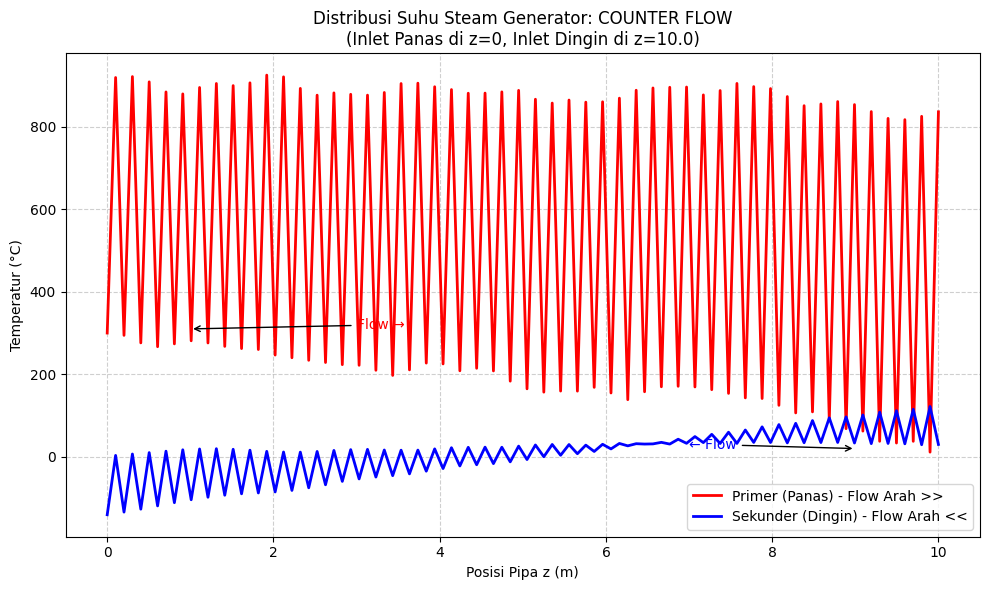

Suhu Keluar Primer (z=10.0): 836.15 °C
Suhu Keluar Sekunder (z=0): -140.36 °C


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, bmat, csc_matrix, lil_matrix
from scipy.sparse.linalg import spsolve

# --- 1. Parameter Fisika ---
L = 10.0           # Panjang pipa (m)
N = 100            # Jumlah grid
dz = L / (N - 1)
T_max = 100.0      # Durasi simulasi (detik)
dt = 0.5           # Langkah waktu
nt = int(T_max / dt)

# Properti Fluida
# Primer (Panas) -> Mengalir ke kanan (+)
W_p = 5.0
Cp_p = 4180.0
rho_p = 1000.0
A_p = 0.01
k_p = 0.6

# Sekunder (Dingin) -> Mengalir ke KIRI (-)
W_s = 4.0
Cp_s = 4180.0
rho_s = 1000.0
A_s = 0.02
k_s = 0.6

# Interaksi
h_eff = 2000.0
S_contact = 0.5

# Suhu Inlet
T_p_inlet = 300.0  # Primer inlet di z=0
T_s_inlet = 30.0   # Sekunder inlet di z=L

# --- 2. Koefisien Persamaan ---
lam_p = rho_p * A_p * Cp_p
beta_p = W_p * Cp_p             # Positif (Flow ke kanan)
gamma_p = k_p * A_p

lam_s = rho_s * A_s * Cp_s
beta_s = -1.0 * W_s * Cp_s      # NEGATIF (Flow ke kiri/Counter)
gamma_s = k_s * A_s

mu = h_eff * S_contact

# --- 3. Fungsi Operator Matriks ---
def create_operators(N, dz, dt, lam, beta, gamma, mu, is_primary):
    """
    Mengembalikan: (M_self_L, M_coup_L, M_self_R, M_coup_R) sebagai sparse diagonal matrices (shape NxN)
    M_self_* adalah tridiagonal (diags dengan offsets -1,0,1).
    M_coup_* adalah diagonal dengan koefisien coupling.
    """
    alpha = lam / dt
    c_adv = beta / (2.0 * dz)      # advective term (central form in CN)
    c_diff = gamma / (dz**2)       # diffusive term
    c_source = mu / 2.0            # coupling per sisi (lihat skema CN)

    # Koef untuk matriks kiri (implicit)
    d_main_L = alpha + 0.5 * (2.0 * c_diff + c_source)
    d_upper_L = 0.5 * (c_adv - c_diff)
    d_lower_L = 0.5 * (-c_adv - c_diff)

    # Koef untuk matriks kanan (explicit)
    d_main_R = alpha - 0.5 * (2.0 * c_diff + c_source)
    d_upper_R = -0.5 * (c_adv - c_diff)
    d_lower_R = -0.5 * (-c_adv - c_diff)

    # Coupling sign: primer mendapat -mu*(T_p - T_s) => signs opposite between equations
    sign = -1.0 if is_primary else 1.0
    coup_L_val = 0.5 * sign * c_source
    coup_R_val = -0.5 * sign * c_source  # sesuai formulasi awalmu (explicit tanda terbalik)

    # Buat tridiagonal (sparse)
    diag_main_L = np.ones(N) * d_main_L
    diag_upper_L = np.ones(N-1) * d_upper_L
    diag_lower_L = np.ones(N-1) * d_lower_L
    M_self_L = diags([diag_lower_L, diag_main_L, diag_upper_L], offsets=[-1,0,1], format='csc')

    diag_main_R = np.ones(N) * d_main_R
    diag_upper_R = np.ones(N-1) * d_upper_R
    diag_lower_R = np.ones(N-1) * d_lower_R
    M_self_R = diags([diag_lower_R, diag_main_R, diag_upper_R], offsets=[-1,0,1], format='csc')

    # Coupling diagonal
    M_coup_L = diags([np.ones(N) * coup_L_val], [0], format='csc')
    M_coup_R = diags([np.ones(N) * coup_R_val], [0], format='csc')

    return M_self_L, M_coup_L, M_self_R, M_coup_R

# Bangun Matriks blok
PL_L, PL_C, PL_R, PL_CR = create_operators(N, dz, dt, lam_p, beta_p, gamma_p, mu, True)
SL_L, SL_C, SL_R, SL_CR = create_operators(N, dz, dt, lam_s, beta_s, gamma_s, mu, False)

# A = [[PL_L, PL_C], [SL_C, SL_L]]
# B = [[PL_R, PL_CR], [SL_CR, SL_R]]
A_mat = bmat([[PL_L, PL_C],
              [SL_C, SL_L]], format='csc')
B_mat = bmat([[PL_R, PL_CR],
              [SL_CR, SL_R]], format='csc')

A_sparse = csc_matrix(A_mat)
B_sparse = csc_matrix(B_mat)

# --- 4. Loop Simulasi ---
# Kondisi Awal: Pipa terisi fluida suhu lingkungan, tapi terapkan inlet pada t=0 juga
T_curr = np.ones(2 * N) * 30.0
T_curr[0] = T_p_inlet        # primer inlet di index 0
T_curr[2*N - 1] = T_s_inlet  # sekunder inlet di index terakhir

# Indeks kondisi batas
idx_p_inlet = 0
idx_s_inlet = 2*N - 1

# Arrays untuk menyimpan sejarah (jika perlu)
history_Tp = []
history_Ts = []

for n in range(nt):
    # RHS = B * T^n
    rhs = B_sparse.dot(T_curr)

    # Terapkan kondisi Dirichlet ke sistem linear: ubah baris A dan rhs
    # Salin A ke dalam format LIL untuk memudahkan modifikasi baris; nanti konversi kembali
    A_mod = A_sparse.tolil()

    # Set seluruh baris ke 0, lalu diagonal jadi 1, rhs = nilai Dirichlet
    for idx, value in [(idx_p_inlet, T_p_inlet), (idx_s_inlet, T_s_inlet)]:
        A_mod.rows[idx] = [idx]
        A_mod.data[idx] = [1.0]
        rhs[idx] = value

    # Konversi kembali ke csc untuk solver
    A_mod = A_mod.tocsc()

    # Solve sistem
    T_next = spsolve(A_mod, rhs)

    # Update
    T_curr = T_next

    # Simpan histori beberapa titik jika ingin
    history_Tp.append(T_curr[:N].copy())
    history_Ts.append(T_curr[N:].copy())

# --- 5. Visualisasi Hasil ---
z = np.linspace(0, L, N)
Tp_final = T_curr[:N]
Ts_final = T_curr[N:]

plt.figure(figsize=(10, 6))
plt.plot(z, Tp_final, '-', linewidth=2, label='Primer (Panas) - Flow Arah >>', linestyle='-', marker='', color='red')
plt.plot(z, Ts_final, '-', linewidth=2, label='Sekunder (Dingin) - Flow Arah <<', linestyle='-', marker='', color='blue')

# Anotasi Arah Aliran (sederhana)
plt.annotate('Flow →', xy=(1.0, T_p_inlet+10), xytext=(3.0, T_p_inlet+10),
             arrowprops=dict(arrowstyle="->"), color='red')
plt.annotate('← Flow', xy=(L-1.0, T_s_inlet-10), xytext=(L-3.0, T_s_inlet-10),
             arrowprops=dict(arrowstyle="->"), color='blue')

plt.title(f'Distribusi Suhu Steam Generator: COUNTER FLOW\n(Inlet Panas di z=0, Inlet Dingin di z={L})')
plt.xlabel('Posisi Pipa z (m)')
plt.ylabel('Temperatur (°C)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Cek Efisiensi Sederhana (Suhu Keluar)
print(f"Suhu Keluar Primer (z={L}): {Tp_final[-1]:.2f} °C")
print(f"Suhu Keluar Sekunder (z=0): {Ts_final[0]:.2f} °C")

## 4. Integral Monte Carlo

### Tugas:
Buat program sederhana (boleh menggunakan Excel, Matlab, Python, dll) untuk menghitung integral *hit and miss Monte Carlo* sebagai berikut:

**Integral 1:**
$$I_1 = \int_{1}^{4} (2x^3 + 3x) \, dx$$

**Integral 2:**
$$I_2 = \int_{1}^{3} \int_{0}^{2} (xy^2 + x^3y) \, dx \, dy$$

### Jawab
Tentu, mari kita selesaikan persoalan matematika ini menggunakan metode komputasi probabilitas.

Metode **Hit and Miss Monte Carlo** bekerja seperti melempar ribuan anak panah secara acak ke sebuah papan persegi panjang.

1.  Kita buat "kotak pembatas" yang melingkupi kurva fungsi.
2.  Kita lempar titik acak $(x, y)$ ke dalam kotak tersebut.
3.  Jika titik jatuh di bawah kurva fungsi ($y_{acak} < f(x_{acak})$), itu adalah **"Hit"**. Jika di atas, itu **"Miss"**.
4.  Luas integral adalah rasio "Hit" dikali luas kotak pembatas.

### 1\. Solusi Analitik

Sebelum membuat program, mari kita hitung solusi eksaknya (analitik) agar kita bisa mengecek keakuratan program nanti.

**Integral 1:**
$$I_1 = \int_{1}^{4} (2x^3 + 3x) \, dx = \left[ \frac{1}{2}x^4 + \frac{3}{2}x^2 \right]_1^4$$
$$I_1 = \left( \frac{256}{2} + \frac{48}{2} \right) - \left( \frac{1}{2} + \frac{3}{2} \right) = (128 + 24) - (2) = \mathbf{150}$$

**Integral 2:**
Asumsi batas integral: $x$ dari 0 s.d 2 (dalam), $y$ dari 1 s.d 3 (luar).
$$I_2 = \int_{1}^{3} \left[ \int_{0}^{2} (xy^2 + x^3y) \, dx \right] dy$$
Integral dalam ($dx$): $\left[ \frac{1}{2}x^2y^2 + \frac{1}{4}x^4y \right]_0^2 = (2y^2 + 4y) - 0$
Integral luar ($dy$): $\int_{1}^{3} (2y^2 + 4y) \, dy = \left[ \frac{2}{3}y^3 + 2y^2 \right]_1^3$
$$I_2 = \left( \frac{54}{3} + 18 \right) - \left( \frac{2}{3} + 2 \right) = (18+18) - 2.667 = 36 - 2.667 = \mathbf{33.333...}$$


### 3\. Penjelasan Algoritma

1.  **Kotak Pembatas (Bounding Box):**

      * Untuk Integral 1, saya mencari nilai maksimum $y$ pada rentang $x=1$ sampai $4$. Nilai maksimumnya adalah $140$. Maka saya membuat kotak dengan lebar $3$ ($4-1$) dan tinggi $140$ (ditambah sedikit margin).
      * Untuk Integral 2, saya mencari nilai maksimum $z$ pada rentang $x(0,2)$ dan $y(1,3)$. Nilai max adalah $42$. Jadi "kotak" 3D-nya bervolume $2 \times 2 \times 42$.

2.  **Random Uniform:**

      * Fungsi `np.random.uniform` adalah inti dari metode ini. Ia menyebar titik secara merata di seluruh kotak.

3.  **Rasio (Probability):**

      * Integral dihitung dengan rumus:
        $$Hasil \approx VolumeKotak \times \frac{\text{Jumlah Titik Hijau (Hit)}}{\text{Total Titik}}$$

### Algoritma
* Tinjau sebuah fungsi $g(x)$ yang berada dalam rentang $A$ dan $B$.
* Jika kita dapat menetapkan nilai $C$ sedemikian rupa sehingga $g(x) < C$ untuk semua $A < x < B$, maka kita dapat menghitung integral di bawah kurva $g(x)$ antara $A$ dan $B$ menggunakan algoritma berikut:

1.  Tetapkan jumlah sampel total ($N_{total}$) dan inisialisasi jumlah *hit* awal sebagai **$N = 0$**.
2.  Bangkitkan 2 bilangan acak **$r1$** dan **$r2$** (nilainya antara 0 dan 1).
3.  Hitung koordinat titik acak $(x_i, y_i)$:
    * $x_i = A + r1 * (B - A)$
    * **$y_i = r2 * C$** *(Koreksi: pada gambar tertulis 'vi', seharusnya 'yi')*
4.  Cek kondisi "Hit":
    * Jika **$y_i < g(x_i)$** maka **$N = N + 1$** *(Koreksi: pada gambar tertulis 'vi', seharusnya 'yi')*
5.  Ulangi langkah ke-2 sampai seluruh jumlah sampel ($N_{total}$) selesai diproses.
6.  Hitung aproksimasi Integral:
    * **Integral $= C * (B - A) * (N / N_{total})$**


--- HASIL INTEGRAL 1 (Algoritma Slide) ---
Fungsi      : 2x^3 + 3x
Range (A-B) : 1 - 4
Tinggi (C)  : 154.00
Sampel (N)  : 50000
Hits        : 16232
Hasil       : 149.9837 (Eksak: 150.0)
Error       : 0.01%


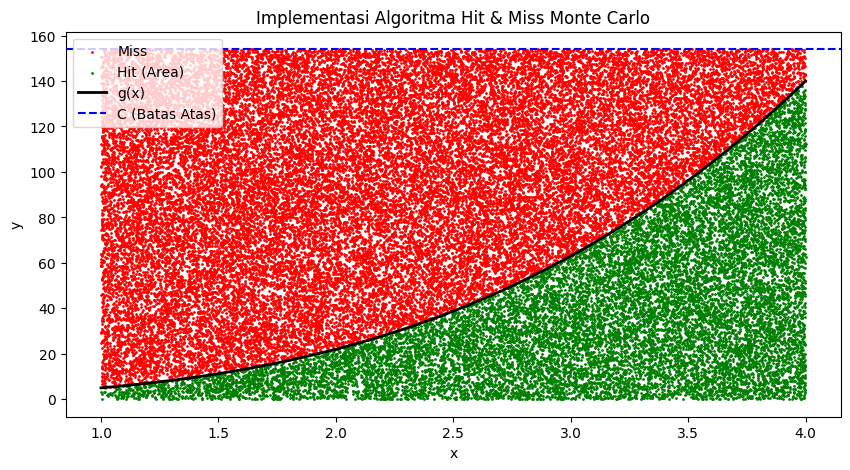


--- HASIL INTEGRAL 2 (Pengembangan 2D) ---
Hasil       : 33.5448 (Eksak: 33.3333)
Error       : 0.63%


In [12]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_new_algo(func, A, B, N_total=10000):
    """
    Menghitung integral menggunakan algoritma Hit and Miss sesuai slide.
    
    Langkah Algoritma:
    1. Set N=0
    2. Generate r1, r2 (acak 0-1)
    3. xi = A + r1*(B-A), yi = r2*C
    4. If yi < g(xi) then N = N+1
    6. Integral = C * (B-A) * (N/N_total)
    """
    
    # --- Persiapan Nilai C (Tinggi Kotak) ---
    # Kita cari nilai maksimum fungsi di rentang A-B untuk menentukan C
    # (Dalam praktek nyata C harus diset manual 'cukup tinggi' agar g(x) < C)
    x_test = np.linspace(A, B, 1000)
    y_test = func(x_test)
    C = np.max(y_test) * 1.1  # Tambah margin 10% agar aman
    
    # --- Langkah 2: Generate r1 dan r2 ---
    # Kita gunakan NumPy array untuk mempercepat proses (vektorisasi) 
    # daripada looping satu per satu yang lambat di Python.
    r1 = np.random.rand(N_total) # Angka acak 0 s.d 1
    r2 = np.random.rand(N_total) # Angka acak 0 s.d 1
    
    # --- Langkah 3: Hitung xi dan yi ---
    # xi = A + r1 * (B - A)
    xi = A + r1 * (B - A)
    
    # yi = r2 * C
    yi = r2 * C
    
    # --- Langkah 4: Cek Hit (yi < g(xi)) ---
    g_xi = func(xi)
    
    # Array boolean (True jika Hit, False jika Miss)
    hits_mask = yi < g_xi 
    
    # Hitung jumlah Hit (N)
    N_hits = np.sum(hits_mask)
    
    # --- Langkah 6: Hitung Integral ---
    # Integral = C * (B - A) * (N / N_total)
    integral_result = C * (B - A) * (N_hits / N_total)
    
    return integral_result, xi, yi, hits_mask, C

# ==========================================
# IMPLEMENTASI PADA SOAL
# ==========================================

# --- Integral 1: f(x) = 2x^3 + 3x ---
def g1(x):
    return 2*x**3 + 3*x

# Parameter
A1, B1 = 1, 4
N_samples = 50000

# Eksekusi Algoritma Baru
I1, xi, yi, hits, C1 = monte_carlo_new_algo(g1, A1, B1, N_samples)

print(f"--- HASIL INTEGRAL 1 (Algoritma Slide) ---")
print(f"Fungsi      : 2x^3 + 3x")
print(f"Range (A-B) : {A1} - {B1}")
print(f"Tinggi (C)  : {C1:.2f}")
print(f"Sampel (N)  : {N_samples}")
print(f"Hits        : {np.sum(hits)}")
print(f"Hasil       : {I1:.4f} (Eksak: 150.0)")
print(f"Error       : {abs(150-I1)/150*100:.2f}%")

# --- Visualisasi Hasil ---
plt.figure(figsize=(10, 5))
# Plot titik Miss (Merah)
plt.scatter(xi[~hits], yi[~hits], color='red', s=1, label='Miss')
# Plot titik Hit (Hijau)
plt.scatter(xi[hits], yi[hits], color='green', s=1, label='Hit (Area)')
# Plot Garis Fungsi
x_line = np.linspace(A1, B1, 100)
plt.plot(x_line, g1(x_line), 'k-', linewidth=2, label='g(x)')
# Plot Garis Batas C
plt.axhline(C1, color='blue', linestyle='--', label='C (Batas Atas)')

plt.title('Implementasi Algoritma Hit & Miss Monte Carlo')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# ==========================================
# Integral 2: 2D (Pengembangan Logika)
# f(x,y) = xy^2 + x^3y
# ==========================================
# Untuk 2D, kita butuh r1, r2, r3.
# xi = Ax + r1*(Bx - Ax)
# yi = Ay + r2*(By - Ay)
# zi = r3 * C_volume

def g2_func(x, y):
    return (x * y**2) + (x**3 * y)

Ax, Bx = 0, 2
Ay, By = 1, 3

# Cari C (Tinggi maksimum z)
# Max pada x=2, y=3 -> z = 2(9) + 8(3) = 18 + 24 = 42
C_vol = 45.0 # Set manual yang aman

# Algoritma
r1 = np.random.rand(N_samples)
r2 = np.random.rand(N_samples)
r3 = np.random.rand(N_samples)

xi_2 = Ax + r1 * (Bx - Ax)
yi_2 = Ay + r2 * (By - Ay)
zi_2 = r3 * C_vol # Ketinggian acak

# Cek Hit
z_actual = g2_func(xi_2, yi_2)
hits_2 = zi_2 < z_actual
N_hits_2 = np.sum(hits_2)

# Hitung Integral Volume
# Luas Alas = (Bx-Ax)*(By-Ay)
# Volume Box Total = Luas Alas * C_vol
vol_box = (Bx - Ax) * (By - Ay) * C_vol
I2 = vol_box * (N_hits_2 / N_samples)

print(f"\n--- HASIL INTEGRAL 2 (Pengembangan 2D) ---")
print(f"Hasil       : {I2:.4f} (Eksak: 33.3333)")
print(f"Error       : {abs(33.3333-I2)/33.3333*100:.2f}%")

In [ ]:
from mpi4py import MPI
import numpy as np
import time

# --- 1. Inisialisasi MPI ---
comm = MPI.COMM_WORLD
rank = comm.Get_rank()  # ID Prosesor (0, 1, 2...)
size = comm.Get_size()  # Total Prosesor

# --- 2. Definisi Fungsi & Parameter ---
def g_func(x):
    # Contoh fungsi: g(x) = 2x^3 + 3x
    return 2*x**3 + 3*x

A = 1.0       # Batas Bawah
B = 4.0       # Batas Atas
N_total = 1000000 # Total sampel yang diinginkan

# Bagi beban kerja (N per prosesor)
N_local = N_total // size

# PENTING: Seed Random harus berbeda tiap prosesor
# Jika tidak, r1 dan r2 akan kembar di semua komputer
np.random.seed(42 + rank)

# --- 3. Menentukan Nilai C (Hanya di Rank 0) ---
C = None
if rank == 0:
    # Cari nilai maksimum fungsi untuk menentukan tinggi kotak C
    x_scan = np.linspace(A, B, 1000)
    y_scan = g_func(x_scan)
    # Sesuai slide: C harus > g(x). Kita beri margin sedikit.
    C = np.max(y_scan) * 1.1
    print(f"[INFO] Rank 0 menetapkan C (Tinggi Kotak) = {C:.4f}")

# Broadcast nilai C dari Rank 0 ke semua prosesor lain
# Agar semua prosesor menggunakan kotak yang tingginya SAMA
C = comm.bcast(C, root=0)

# --- 4. Mulai Algoritma (Parallel) ---
comm.Barrier() # Sinkronisasi waktu mulai
start_time = time.time()

# --- LANGKAH 2: Generate r1 dan r2 ---
# Setiap prosesor membuat r1 & r2 sendiri sebanyak N_local
r1 = np.random.rand(N_local)
r2 = np.random.rand(N_local)

# --- LANGKAH 3: Hitung xi dan yi ---
# xi = A + r1 * (B - A)
xi = A + r1 * (B - A)

# yi = r2 * C  (Sesuai perbaikan algoritma)
yi = r2 * C

# --- LANGKAH 4: Cek Hit (yi < g(xi)) ---
g_xi = g_func(xi)
local_hits_mask = yi < g_xi
local_N = np.sum(local_hits_mask) # Jumlah N di prosesor ini

# --- 5. Pengumpulan Data (Reduction) ---
# Mengirim jumlah hit lokal ke Rank 0 untuk dijumlahkan
total_N = comm.reduce(local_N, op=MPI.SUM, root=0)

# --- 6. Perhitungan Akhir (Hanya di Rank 0) ---
if rank == 0:
    end_time = time.time()
    
    # Hitung total sampel aktual (antisipasi pembulatan integer)
    actual_N_tot = N_local * size
    
    # --- LANGKAH 6: Rumus Integral ---
    # Integral = C * (B - A) * (N / Ntot)
    integral_result = C * (B - A) * (total_N / actual_N_tot)
    
    # Output
    print("-" * 40)
    print(f"HASIL PARALEL ({size} Prosesor)")
    print("-" * 40)
    print(f"Total Sampel (Ntot) : {actual_N_tot}")
    print(f"Total Hits (N)      : {total_N}")
    print(f"Nilai C             : {C:.4f}")
    print(f"Hasil Integral      : {integral_result:.5f}")
    print(f"Waktu Komputasi     : {end_time - start_time:.4f} detik")
    
    # Cek Error (Nilai Eksak = 150.0)
    error = abs(150.0 - integral_result) / 150.0 * 100
    print(f"Error               : {error:.4f}%")

## 5. Model Pasang Surut

Pasang surut adalah gejala alam yang terjadi akibat gravitasi bulan yang dipengaruhi oleh posisi bulan.

### Tugas:
1. Rumuskan gejala pasang surut ini.
2. Buatlah program untuk menghitung ketinggian air laut sebagai fungsi posisi bulan.

### Jawab

kita akan menggunakan pendekatan **Teori Pasang Surut Kesetimbangan (*Equilibrium Tide Theory*)** yang dikembangkan oleh Newton. Ini adalah model fisika yang paling fundamental sebelum memperhitungkan bentuk garis pantai atau kedalaman laut.

### 1\. Perumusan Fisika (Formulasi)

Pasang surut tidak disebabkan oleh gravitasi bulan secara langsung, melainkan oleh **Gaya Pembangkit Pasang Surut (*Tide-Generating Force*)**. Gaya ini adalah selisih antara gaya gravitasi Bulan di permukaan Bumi dengan gaya sentrifugal sistem Bumi-Bulan di pusat Bumi.

Bentuk permukaan laut ideal ($\eta$) pada sudut $\theta$ relatif terhadap posisi Bulan diberikan oleh rumus Legendre Polynomial orde 2:

$$\eta(\theta) = \frac{M_m}{M_e} \left( \frac{R_e}{r} \right)^3 R_e \left( \frac{3 \cos^2 \theta - 1}{2} \right)$$

Dimana:

  * $\eta$: Ketinggian air dari permukaan rata-rata (meter).
  * $M_m$: Massa Bulan ($7.34 \times 10^{22}$ kg).
  * $M_e$: Massa Bumi ($5.97 \times 10^{24}$ kg).
  * $R_e$: Jari-jari Bumi ($6.371 \times 10^6$ m).
  * $r$: Jarak pusat Bumi ke Bulan ($\approx 3.84 \times 10^8$ m).
  * $\theta$: **Sudut Zenith Bulan** (Sudut antara posisi pengamat di Bumi dengan posisi Bulan).

**Mengapa terjadi 2 kali pasang sehari?**
Perhatikan suku $(3 \cos^2 \theta - 1)$.

  * Saat Bulan tepat di atas kepala ($\theta = 0^\circ$), nilainya maksimum (Pasang).
  * Saat Bulan di balik Bumi ($\theta = 180^\circ$), nilainya juga maksimum karena $(-1)^2 = 1$ (Pasang Dua).
  * Saat Bulan di cakrawala/terbit/terbenam ($\theta = 90^\circ$), nilainya minimum (Surut).

### 2\. Solusi Numerik (Program Python)

Kita akan membuat simulasi posisi air laut selama 2 hari (48 jam).
Karena Bumi berputar, sudut $\theta$ (posisi pengamat relatif terhadap bulan) berubah terus menerus.

**Logika Program:**

1.  Tentukan lokasi pengamat (Lintang/Latitude).
2.  Tentukan posisi Bulan (Deklinasi - sudut kemiringan orbit bulan dari ekuator).
3.  Hitung sudut $\theta$ setiap detik menggunakan **Trigonometri Bola (*Spherical Trigonometry*)**.
4.  Masukkan ke rumus Equilibrium Tide di atas.

### 3\. Analisis Hasil Model

Jika Anda menjalankan program ini, Anda akan melihat fenomena menarik yang sesuai dengan kenyataan:

1.  **Semidiurnal (Dua Harian):** Dalam 24 jam (lebih sedikit, tepatnya 24.8 jam), terdapat dua bukit gelombang (dua pasang) dan dua lembah (dua surut).
2.  **Amplitudo Fisik:** Hasil perhitungan teoritis murni (Equilibrium) biasanya memberikan angka sekitar **30-50 cm**.
      * *Pertanyaan:* Kenapa di dunia nyata pasang bisa 2 meter atau bahkan 10 meter (seperti di Kanada)?
      * *Jawaban:* Model ini mengasumsikan Bumi tertutup air seluruhnya dengan kedalaman tak hingga. Di dunia nyata, resonansi air di teluk dangkal dan bentuk garis pantai memperbesar (mengamplifikasi) gelombang pasang surut ini secara drastis.
3.  **Ketidaksamaan Harian (Diurnal Inequality):** Jika Anda mengubah deklinasi bulan menjadi tinggi (misal 28 derajat), Anda akan melihat tinggi pasang pagi dan pasang sore *tidak sama tingginya*. Ini disebabkan karena posisi pengamat tidak sejajar lurus dengan tonjolan air saat Bumi berputar.

Model sederhana ini adalah dasar bagi *tide table* (tabel pasang surut) yang digunakan pelaut, yang kemudian dikoreksi dengan data observasi lapangan (konstanta harmonik) untuk prediksi yang presisi.

### Algoritma
**Metode:** Teori Kesetimbangan (Equilibrium Tide)
1.  **Parameter:** Tetapkan lokasi pengamat (Lintang) dan posisi Bulan (Deklinasi).
2.  **Loop Waktu:** Untuk setiap jam $t$:
    * Hitung Sudut Jam ($H$) berdasarkan rotasi Bumi.
    * Hitung Sudut Zenith ($\theta$) antara pengamat dan Bulan menggunakan trigonometri bola.
    * Hitung tinggi air ($\eta$) dengan rumus potensial pasang surut:
        $\eta \propto \left( 3 \cos^2 \theta - 1 \right)$  

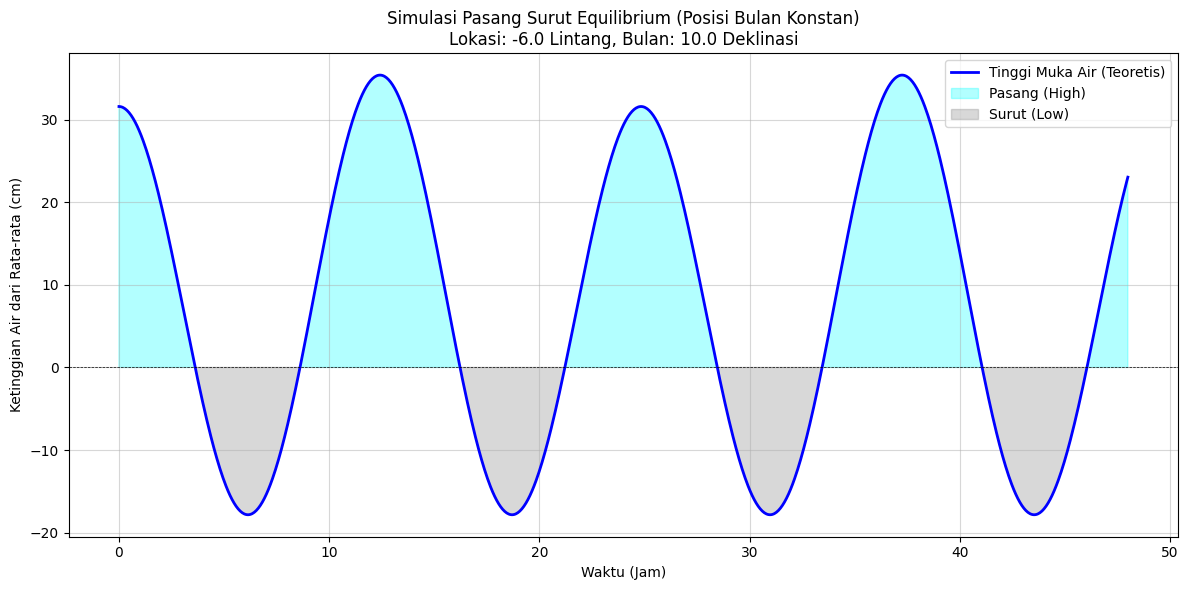

Amplitudo Pasang Teoritis Maksimum: 35.40 cm


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Konstanta Fisika ---
M_moon = 7.342e22   # kg
M_earth = 5.972e24  # kg
R_earth = 6371000   # meter (Jari-jari Bumi)
r_distance = 384400000 # meter (Jarak Bumi-Bulan rata-rata)

# Konstanta Amplitudo (Konstanta Doodson Sederhana)
# C = (Mm / Me) * (Re / r)^3 * Re
C = (M_moon / M_earth) * (R_earth / r_distance)**3 * R_earth

# --- 2. Parameter Lokasi & Waktu ---
# Lokasi Pengamat (Misal: Jakarta ~ 6 derajat Lintang Selatan)
lat_observer_deg = -6.0 
lat_obs = np.radians(lat_observer_deg)

# Posisi Bulan (Misal: Bulan ada di Deklinasi 10 derajat Utara)
declination_moon_deg = 10.0
dec_moon = np.radians(declination_moon_deg)

# Waktu Simulasi (48 Jam)
hours = np.linspace(0, 48, 1000)
# Kecepatan Rotasi Bumi relative terhadap Bulan (Lunar Day = 24.84 jam)
# Omega = 2*pi / T_lunar
omega = 2 * np.pi / 24.84 

# --- 3. Perhitungan Geometri Bola ---
def hitung_tinggi_pasang(t_jam):
    # Sudut Jam (Hour Angle) - Posisi rotasi bumi
    # H = omega * t
    H = omega * t_jam
    
    # Menghitung Sudut Zenith (Theta) menggunakan Hukum Cosinus Bola
    # cos(theta) = sin(Lat)*sin(Dec) + cos(Lat)*cos(Dec)*cos(H)
    cos_theta = (np.sin(lat_obs) * np.sin(dec_moon) + 
                 np.cos(lat_obs) * np.cos(dec_moon) * np.cos(H))
    
    # Rumus Equilibrium Tide: h = C * (3*cos^2(theta) - 1) / 2
    # Kita kalikan faktor koreksi (~0.7) karena bumi elastis (Love numbers) 
    # Namun untuk model fluida murni kita pakai 1.0 atau abaikan koreksi tanah.
    
    height = C * (3 * cos_theta**2 - 1) / 2
    return height

# Hitung Array
tide_levels = hitung_tinggi_pasang(hours)

# --- 4. Visualisasi ---
plt.figure(figsize=(12, 6))

# Plot ketinggian air
plt.plot(hours, tide_levels * 100, color='b', linewidth=2, label='Tinggi Muka Air (Teoretis)')

# Garis referensi nol
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

plt.title(f'Simulasi Pasang Surut Equilibrium (Posisi Bulan Konstan)\nLokasi: {lat_observer_deg} Lintang, Bulan: {declination_moon_deg} Deklinasi')
plt.xlabel('Waktu (Jam)')
plt.ylabel('Ketinggian Air dari Rata-rata (cm)')
plt.grid(True, alpha=0.5)

# Menandai Puncak (High Tide) dan Lembah (Low Tide)
plt.fill_between(hours, tide_levels*100, 0, where=(tide_levels>0), color='cyan', alpha=0.3, label='Pasang (High)')
plt.fill_between(hours, tide_levels*100, 0, where=(tide_levels<0), color='gray', alpha=0.3, label='Surut (Low)')

plt.legend()
plt.tight_layout()
plt.show()

print(f"Amplitudo Pasang Teoritis Maksimum: {np.max(tide_levels)*100:.2f} cm")

## 6. Persoalan Difusi (A)

Sebuah persoalan difusi dirumuskan sebagai berikut (lengkapi persamaan sesuai soal asli jika ada gambar/teks tambahan):

$$
\nabla^2 X(x, y, z) + \alpha X(x, y, z) = S_0(x, y, z)
$$

### Tugas:
* **a.** Pecahkan persamaan di atas dengan metoda **beda hingga**.
* **b.** Tuliskan algoritma pemrogramannya dengan **program serial**.
* **c.** Tuliskan algoritma pemrogramannya dengan **program paralel** secara umum.
* **d.** Jelaskan prospek paralelisasi dengan sistem *multi-core* dan MPI berbasis jaringan 1 GBps.

### Jawab
Ini adalah persoalan klasik **Persamaan Helmholtz** (atau Difusi-Reaksi steady-state). Persoalan ini merupakan Persamaan Diferensial Parsial (PDP) tipe eliptik yang membutuhkan penyelesaian iteratif pada grid 3D.

### a. Pemecahan dengan Metoda Beda Hingga (Finite Difference)

Kita gunakan grid 3D dengan indeks $(i, j, k)$ dan jarak antar titik grid seragam $\Delta x = \Delta y = \Delta z = h$.

**1. Diskretisasi Operator Laplacian ($\nabla^2$)**
Kita gunakan pendekatan *Central Difference* (Beda Pusat) orde kedua:

$$
\frac{\partial^2 X}{\partial x^2} \approx \frac{X_{i+1,j,k} - 2X_{i,j,k} + X_{i-1,j,k}}{h^2}
$$

(Lakukan hal yang sama untuk sumbu $y$ dan $z$).

**2. Substitusi ke Persamaan Awal**
Persamaan asli:

$$
\left( \frac{\partial^2 X}{\partial x^2} + \frac{\partial^2 X}{\partial y^2} + \frac{\partial^2 X}{\partial z^2} \right) + \alpha X_{i,j,k} = S_{i,j,k}
$$

Dalam bentuk diskrit:

$$
\frac{X_{i+1} + X_{i-1} - 2X_{i,j,k}}{h^2} + \frac{X_{j+1} + X_{j-1} - 2X_{i,j,k}}{h^2} + \frac{X_{k+1} + X_{k-1} - 2X_{i,j,k}}{h^2} + \alpha X_{i,j,k} = S_{i,j,k}
$$

**3. Penyusunan Ulang (Skema Iteratif)**
Kita kumpulkan suku $X_{i,j,k}$ di satu sisi untuk mendapatkan rumus update (Metode Jacobi):

$$
\frac{1}{h^2} \left( \sum X_{tetangga} - 6X_{i,j,k} \right) + \alpha X_{i,j,k} = S_{i,j,k}
$$

Kalikan semua dengan $h^2$:

$$
\sum X_{tetangga} - 6X_{i,j,k} + \alpha h^2 X_{i,j,k} = h^2 S_{i,j,k}
$$

$$
X_{i,j,k} (\alpha h^2 - 6) = h^2 S_{i,j,k} - \sum X_{tetangga}
$$

**Rumus Akhir (Update Rule):**

$$
X_{i,j,k}^{baru} = \frac{\sum X_{tetangga} - h^2 S_{i,j,k}}{6 - \alpha h^2}
$$

Dimana $\sum X_{tetangga}^{n} = X_{i\pm1, j, k} + X_{i, j\pm1, k} + X_{i, j, k\pm1}$.






### b. Algoritma Serial

1.  **Inisialisasi:** $X_{i,j,k}^{(0)} = 0$ dan tentukan $S_{i,j,k}$.
2.  **Iterasi ($n = 0 \to Max$):**
    * Untuk setiap $i, j, k$ dari $1$ sampai $N-1$:
        $$X_{i,j,k}^{(n+1)} \leftarrow \text{Rumus Solusi di poin (a)}$$
    * Hitung Error: $\epsilon = \sum |X^{(n+1)} - X^{(n)}|$.
    * Jika $\epsilon < \text{Toleransi}$, berhenti.
    * Update: $X^{(n)} \leftarrow X^{(n+1)}$.


### c. Algoritma Paralel (MPI / Domain Decomposition)

Misal grid dibagi searah sumbu $z$ ke $P$ prosesor. Setiap prosesor memiliki sub-domain $z \in [z_{start}, z_{end}]$.

1.  **Setup:** Tentukan tetangga ($Rank_{up}, Rank_{down}$).
2.  **Iterasi:**
    * **Komunikasi (Halo Exchange):**
        * Kirim data plane $z_{end}$ ke $Rank_{down}$.
        * Terima data plane $z_{end}+1$ (Ghost Cell).
        * Kirim data plane $z_{start}$ ke $Rank_{up}$.
        * Terima data plane $z_{start}-1$ (Ghost Cell).
    * **Komputasi Lokal:**
        * Hitung $X_{i,j,k}^{(n+1)}$ untuk $z$ lokal menggunakan rumus poin (a).
    * **Reduksi Global:**
        * `MPI_Allreduce`($\epsilon_{lokal}$, $\epsilon_{global}$, SUM).
    * **Cek Konvergensi:** Jika $\epsilon_{global} < \text{Toleransi}$, keluar loop.

### d. Analisis Prospek Paralelisasi

Evaluasi efisiensi pada jaringan 1 GBps:

$$
\text{Rasio Aritmatika} = \frac{\text{Operasi Floating Point}}{\text{Byte Komunikasi}}
$$

* **Sistem Multi-core (Shared Memory):**
    * **Prospek: Sangat Baik.** Bandwidth memori internal ($>20$ GBps) sangat cepat. Latency minimal.
* **Sistem MPI (Jaringan 1 GBps):**
    * **Prospek: Buruk/Terbatas.**
    * Persoalan ini memiliki intensitas komunikasi tinggi (stencil 7-point). Bandwidth 1 GBps ($\approx 125$ MB/s) akan menjadi *bottleneck* parah.
    * CPU akan *idle* menunggu data dari jaringan. Hanya efisien jika ukuran grid ($N$) **sangat besar** sehingga waktu hitung $O(N^3)$ mendominasi waktu kirim data $O(N^2)$.

Perbandingan antara sistem Multi-core (Shared Memory) dan MPI (Distributed Memory) pada jaringan 1 GBps untuk kasus ini:

#### 1\. Karakteristik Masalah (Stencil 7-Point)

Persoalan difusi ini memiliki rasio **Komputasi terhadap Komunikasi yang Rendah**.

  * Untuk menghitung 1 titik, hanya butuh sekitar 7-8 operasi matematika (tambah/kurang/bagi).
  * Namun, setiap iterasi *harus* mengambil data tetangga. Ini berarti lalu lintas data sangat padat.

#### 2\. Sistem Multi-core (Shared Memory / OpenMP)

  * **Prospek: SANGAT BAIK.**
  * **Alasan:** Dalam satu komputer (node), komunikasi antar *core* terjadi lewat RAM atau L3 Cache yang kecepatannya sangat tinggi (puluhan GB/s).
  * Biaya sinkronisasi rendah. Model pemrograman OpenMP cukup mudah diterapkan pada loop `for`.

#### 3\. Sistem MPI dengan Jaringan 1 GBps

  * **Prospek: BURUK / TERBATAS.**
  * **Alasan (Bottleneck Jaringan):**
      * **Bandwidth:** 1 GBps (Gigabit per second) hanya setara $\approx 125$ MB/s. Ini sangat lambat dibandingkan kecepatan CPU memproses data. CPU akan sering *idle* (menganggur) menunggu data "Halo Exchange" dari tetangga datang lewat kabel LAN.
      * **Latency:** Setiap kali kirim pesan, ada *delay* awal. Karena difusi butuh pertukaran *setiap satu iterasi*, akumulasi delay ini mematikan performa (speedup tidak linear, bahkan bisa lebih lambat dari serial jika grid terlalu kecil).
  * **Solusi:** Agar MPI efektif di jaringan 1 GBps, ukuran masalah (Grid $N$) harus **SANGAT BESAR**. Jika $N$ besar, waktu komputasi (yang pangkat 3, $N^3$) akan mendominasi waktu komunikasi (yang pangkat 2, $N^2$ area permukaan), sehingga rasio efisiensi membaik.

Mulai Simulasi Serial Grid 50x50x50...
Iterasi 0, Error: 0.006941
Iterasi 100, Error: 0.001515
Iterasi 200, Error: 0.000627
Iterasi 300, Error: 0.000358
Iterasi 400, Error: 0.000238
Iterasi 500, Error: 0.000171
Iterasi 600, Error: 0.000129
Iterasi 700, Error: 0.000100
Konvergen pada iterasi ke-702 dengan Error 0.000100
Waktu Komputasi: 0.6509 detik


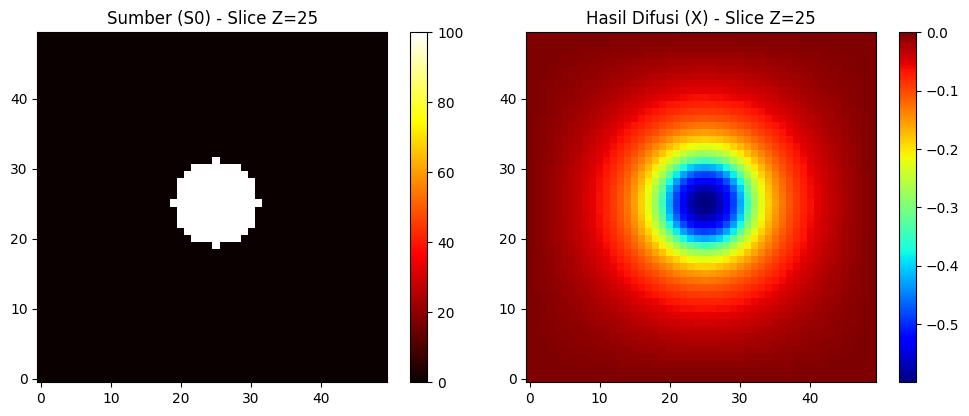

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import time

def solve_diffusion_3d_serial(N, alpha, tolerance=1e-4, max_iter=1000):
    """
    Menyelesaikan: Laplacian(X) + alpha*X = S0
    Metode: Beda Hingga (Finite Difference) - Skema Jacobi
    """
    
    # 1. Setup Grid dan Parameter
    h = 1.0 / (N - 1)  # Jarak antar titik (Delta x)
    
    # Inisialisasi Array 3D (X dan X_baru)
    X = np.zeros((N, N, N))
    X_new = np.zeros((N, N, N))
    
    # 2. Definisi Source Term (S0)
    # Misal: Ada sumber panas berbentuk bola di tengah kubus
    S0 = np.zeros((N, N, N))
    mid = N // 2
    r_source = N // 8
    
    # Buat sumber panas di tengah
    z, y, x = np.ogrid[:N, :N, :N]
    mask = (x - mid)**2 + (y - mid)**2 + (z - mid)**2 <= r_source**2
    S0[mask] = 100.0  # Kekuatan sumber
    
    # Konstanta penyebut (Pre-calculation)
    # Rumus: X_new = (Sum_Tetangga - h^2 * S0) / (6 - alpha * h^2)
    denom = 6.0 - (alpha * h**2)
    h2 = h**2
    
    print(f"Mulai Simulasi Serial Grid {N}x{N}x{N}...")
    start_time = time.time()
    
    # 3. Loop Iterasi
    for it in range(max_iter):
        # --- Update Jacobi (Vektorisasi) ---
        # Kita update bagian dalam (interior) grid: index 1 sampai N-1
        # X[z, y, x]
        
        # Jumlahkan 6 tetangga
        sum_neighbors = (
            X[2:, 1:-1, 1:-1] +  # Tetangga Kanan (x+1) -> di numpy axis 0 = z, axis 2 = x
            X[:-2, 1:-1, 1:-1] + # Tetangga Kiri (x-1)
            X[1:-1, 2:, 1:-1] +  # Tetangga Belakang (y+1)
            X[1:-1, :-2, 1:-1] + # Tetangga Depan (y-1)
            X[1:-1, 1:-1, 2:] +  # Tetangga Atas (z+1)
            X[1:-1, 1:-1, :-2]   # Tetangga Bawah (z-1)
        )
        
        # Hitung X baru sesuai rumus
        X_new[1:-1, 1:-1, 1:-1] = (sum_neighbors - (h2 * S0[1:-1, 1:-1, 1:-1])) / denom
        
        # --- Cek Konvergensi ---
        # Hitung selisih absolut rata-rata (L1 Norm) atau Max (Infinity Norm)
        diff = np.max(np.abs(X_new - X))
        
        # Update X
        X[:] = X_new[:] # Salin nilai
        
        if diff < tolerance:
            print(f"Konvergen pada iterasi ke-{it} dengan Error {diff:.6f}")
            break
        
        if it % 100 == 0:
            print(f"Iterasi {it}, Error: {diff:.6f}")

    end_time = time.time()
    print(f"Waktu Komputasi: {end_time - start_time:.4f} detik")
    return X, S0

# --- Eksekusi ---
N_grid = 50       # Ukuran Grid 50x50x50
alpha_val = -1.0  # Parameter Alpha
hasil_X, sumber_S = solve_diffusion_3d_serial(N_grid, alpha_val)

# --- Visualisasi (Slice Tengah) ---
mid_slice = N_grid // 2
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(sumber_S[mid_slice, :, :], cmap='hot', origin='lower')
plt.title(f'Sumber (S0) - Slice Z={mid_slice}')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(hasil_X[mid_slice, :, :], cmap='jet', origin='lower')
plt.title(f'Hasil Difusi (X) - Slice Z={mid_slice}')
plt.colorbar()

plt.tight_layout()
plt.show()

In [ ]:
from mpi4py import MPI
import numpy as np
import time

# --- Setup MPI ---
comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

# --- Parameter Soal ---
N_global = 60         # Ukuran total grid (harus bisa dibagi jumlah prosesor biar mudah)
alpha = -1.0
tolerance = 1e-4
max_iter = 2000

# Pastikan N_global habis dibagi size
if N_global % size != 0:
    if rank == 0:
        print("Error: N_global harus habis dibagi jumlah prosesor.")
    exit()

# --- Dekomposisi Domain (Sumbu Z) ---
# Setiap prosesor menghandle N_local lapisan
N_local = N_global // size
h = 1.0 / (N_global - 1)
h2 = h**2
denom = 6.0 - (alpha * h2)

# Alokasi Array Lokal
# +2 untuk Ghost Cells (Lapisan hantu di atas dan bawah)
# Ukuran array lokal: [N_local + 2, N_global, N_global]
# Indeks Z lokal: 1 sampai N_local adalah data real. 0 dan -1 adalah ghost.
X_local = np.zeros((N_local + 2, N_global, N_global))
X_new_local = np.zeros((N_local + 2, N_global, N_global))

# Setup Source (S0) Lokal
# Kita harus menentukan koordinat global Z untuk mengisi source dengan benar
z_start_global = rank * N_local
S0_local = np.zeros((N_local + 2, N_global, N_global))

# Buat Source Bola di tengah kubus global
mid = N_global // 2
r_source = N_global // 8

for z_loc in range(1, N_local + 1):
    z_glob = z_start_global + (z_loc - 1)
    # Vektorisasi setup source pada plane Z ini
    y, x = np.ogrid[:N_global, :N_global]
    mask = (x - mid)**2 + (y - mid)**2 + (z_glob - mid)**2 <= r_source**2
    S0_local[z_loc][mask] = 100.0

# Tetangga MPI
up_neighbor = rank + 1 if rank < size - 1 else MPI.PROC_NULL
down_neighbor = rank - 1 if rank > 0 else MPI.PROC_NULL

# --- Loop Iterasi ---
if rank == 0:
    print(f"Mulai Paralel MPI: Grid {N_global}^3 pada {size} Prosesor.")
    start_time = time.time()

for it in range(max_iter):
    
    # 1. Komunikasi Halo (Ghost Cell Exchange)
    # Kirim data paling atas (index N_local) ke Up, Terima dari Up taruh di (index N_local+1)
    # Kirim data paling bawah (index 1) ke Down, Terima dari Down taruh di (index 0)
    
    reqs = []
    
    # Kirim ke ATAS, Terima dari BAWAH
    # Send buffer: X_local[N_local] -> Recv buffer: X_local[0] (milik tetangga atas)
    # Logika SendRecv:
    
    # A. Fase Ganjil-Genap untuk mencegah Deadlock atau pakai Sendrecv
    # Pola: Kirim batas Atas saya ke tetangga Atas
    #       Terima batas Bawah saya dari tetangga Bawah
    
    # Kirim lapisan Z teratas (real) saya ke Rank+1
    # Terima lapisan Z terbawah (ghost) saya dari Rank-1
    comm.Sendrecv(sendobj=X_local[N_local, :, :], dest=up_neighbor,
                  recvobj=X_local[0, :, :], source=down_neighbor)
                  
    # Kirim lapisan Z terbawah (real) saya ke Rank-1
    # Terima lapisan Z teratas (ghost) saya dari Rank+1
    comm.Sendrecv(sendobj=X_local[1, :, :], dest=down_neighbor,
                  recvobj=X_local[N_local+1, :, :], source=up_neighbor)
    
    # 2. Update Jacobi Lokal
    # Hanya update interior lokal (index 1 s.d N_local)
    # Tetangga Z diambil dari index z+1 dan z-1 (yang mungkin adalah ghost cell)
    
    sum_neighbors = (
        X_local[1:-1, 1:-1, 2:] +   # x+1
        X_local[1:-1, 1:-1, :-2] +  # x-1
        X_local[1:-1, 2:, 1:-1] +   # y+1
        X_local[1:-1, :-2, 1:-1] +  # y-1
        X_local[2:, 1:-1, 1:-1] +   # z+1 (pakai ghost cell jika di batas)
        X_local[:-2, 1:-1, 1:-1]    # z-1 (pakai ghost cell jika di batas)
    )
    
    X_new_local[1:-1, 1:-1, 1:-1] = (sum_neighbors - (h2 * S0_local[1:-1, 1:-1, 1:-1])) / denom
    
    # 3. Handle Boundary Conditions Global (Kulit terluar kubus = 0)
    # Batas Samping X dan Y sudah terhandle otomatis karena index 1:-1
    # Batas Z Global (Rank 0 sisi bawah dan Rank Akhir sisi atas)
    if rank == 0:
        X_new_local[1, :, :] = 0.0 # Z=0 global
    if rank == size - 1:
        X_new_local[N_local, :, :] = 0.0 # Z=Max global
        
    # 4. Hitung Error Lokal
    local_diff = np.max(np.abs(X_new_local[1:-1] - X_local[1:-1]))
    
    # 5. Reduksi Error (Cari Max error dari semua prosesor)
    global_diff = comm.allreduce(local_diff, op=MPI.MAX)
    
    # Update array
    X_local[:] = X_new_local[:]
    
    if global_diff < tolerance:
        if rank == 0:
            print(f"Konvergen pada iterasi {it}. Error: {global_diff}")
        break
        
    if rank == 0 and it % 100 == 0:
        print(f"Iterasi {it}, Global Error: {global_diff:.6f}")

# --- Output Akhir ---
if rank == 0:
    end_time = time.time()
    print(f"Selesai dalam {end_time - start_time:.4f} detik.")

## 7. Model Sistem Matematika

Sebuah persoalan model sistem dapat dituliskan dalam persamaan matematika dengan konstanta $a_i, X_i$, dan $S_i$. Indeks mesh spatial ditunjukkan oleh $n$ dimana $n=1, 2, ..., N$.

$$
\begin{aligned}
\frac{dX_{n,1}}{dt} &= S_{n,1} - a_1 X_{n,1} \\
\frac{dX_{n,2}}{dt} &= S_{n,2} + a_1 X_{n,1} - a_2 X_{n,2} \\
&... \\
\frac{dX_{n,i}}{dt} &= S_{n,i} + a_{i-1} X_{n,i-1} - a_i X_{n,i} \\
&... \\
\frac{dX_{n,I}}{dt} &= S_{n,I} + a_{I-1} X_{n,I-1}
\end{aligned}
$$

### Tugas:
* **a.** Pecahkan persamaan tersebut dengan metoda **beda hingga dengan pendekatan implisit** (ruas kanan memakai waktu baru).
* **b.** Tuliskan algoritma pemecahan persoalan ini dengan **program serial**.
* **c.** Tuliskan algoritma pemecahan persoalan ini dengan **program paralel** secara umum.
* **d.** Jelaskan prospek paralelisasi dengan sistem *multi-core* dan MPI berbasis jaringan 1 GBps.

### Jawab
Ini adalah persoalan sistem persamaan diferensial biasa (ODE) yang digabung dengan indeks spasial, namun **tidak memiliki ketergantungan antar ruang** (tidak ada turunan terhadap $n$). Ini sering disebut sebagai persoalan *Point Kinetics* atau *Reaction Chain* (seperti peluruhan radioaktif berantai atau kinetika kimia).

Berikut adalah pemecahannya:


### a. Pemecahan dengan Metoda Beda Hingga (Pendekatan Implisit)

Kita gunakan diskretisasi waktu **Backward Euler** (Implisit).
Definisi:
* $X_{n,i}^{k}$ = Nilai pada waktu lama ($t$).
* $X_{n,i}^{k+1}$ = Nilai pada waktu baru ($t + \Delta t$).

Persamaan umumnya adalah:
$$\frac{X_{n,i}^{k+1} - X_{n,i}^{k}}{\Delta t} = \text{RHS evaluated at } (k+1)$$

**1. Untuk Komponen Pertama ($i=1$):**
$$
\frac{X_{n,1}^{k+1} - X_{n,1}^{k}}{\Delta t} = S_{n,1} - a_1 X_{n,1}^{k+1}
$$
Susun ulang untuk mendapatkan $X_{n,1}^{k+1}$:
$$X_{n,1}^{k+1} (1 + a_1 \Delta t) = X_{n,1}^{k} + S_{n,1} \Delta t$$
$$\mathbf{X_{n,1}^{k+1} = \frac{X_{n,1}^{k} + S_{n,1} \Delta t}{1 + a_1 \Delta t}}$$

**2. Untuk Komponen ke-$i$ ($i=2 \dots I-1$):**
$$
\frac{X_{n,i}^{k+1} - X_{n,i}^{k}}{\Delta t} = S_{n,i} + a_{i-1} X_{n,i-1}^{k+1} - a_i X_{n,i}^{k+1}
$$
Perhatikan bahwa $X_{n,i-1}^{k+1}$ (spesies sebelumnya pada waktu baru) **sudah diketahui** dari langkah sebelumnya karena kita menghitung urut dari $i=1$.
$$X_{n,i}^{k+1} (1 + a_i \Delta t) = X_{n,i}^{k} + S_{n,i} \Delta t + a_{i-1} \Delta t X_{n,i-1}^{k+1}$$
$$\mathbf{X_{n,i}^{k+1} = \frac{X_{n,i}^{k} + \Delta t (S_{n,i} + a_{i-1} X_{n,i-1}^{k+1})}{1 + a_i \Delta t}}$$

**3. Untuk Komponen Terakhir ($i=I$):**
$$\mathbf{X_{n,I}^{k+1} = X_{n,I}^{k} + \Delta t (S_{n,I} + a_{I-1} X_{n,I-1}^{k+1})}$$

### b. Algoritma Program Serial

Karena tidak ada turunan spasial (tidak ada $X_{n+1}$ atau $X_{n-1}$ dalam persamaan), setiap titik $n$ bersifat independen. Namun, perhitungan spesies $i$ harus berurutan (Sekuensial terhadap indeks $i$).

1.  **Inisialisasi:**
    * Set parameter $a[1..I]$, $S[1..N][1..I]$.
    * Set Kondisi Awal $X[1..N][1..I]$ pada $t=0$.
    * Tentukan $\Delta t$ dan $T_{max}$.

2.  **Loop Waktu ($t = 0$ sampai $T_{max}$):**
    * **Loop Spasial ($n = 1$ sampai $N$):**
        * **Loop Spesies ($i = 1$ sampai $I$):**
            * Jika $i == 1$:
                Hitung $X_{n,1}^{baru}$ pakai Rumus 1.
            * Jika $1 < i < I$:
                Ambil $X_{n,i-1}^{baru}$ yang baru saja dihitung.
                Hitung $X_{n,i}^{baru}$ pakai Rumus 2.
            * Jika $i == I$:
                Hitung $X_{n,I}^{baru}$ pakai Rumus 3.
        * *(Optimasi Memori)*: Update array $X$ langsung atau salin buffer.
    * Simpan data jika perlu.

### c. Algoritma Program Paralel (MPI)

Sifat persoalan ini adalah **Embarrassingly Parallel** pada domain spasial. Titik $n=1$ sama sekali tidak membutuhkan data dari titik $n=2$.

1.  **Dekomposisi Domain:**
    * Bagi total titik spatial $N$ secara merata ke jumlah prosesor ($P$).
    * Setiap prosesor bertanggung jawab atas rentang $n_{start}$ sampai $n_{end}$.

2.  **Setup MPI:**
    * Rank 0 membagikan data awal ($S$ dan $X_{init}$) menggunakan `MPI_Scatter`.

3.  **Loop Waktu Lokal (Tanpa Komunikasi):**
    * Setiap prosesor menjalankan **Algoritma Serial (b)** hanya untuk rentang $n$ miliknya.
    * **PENTING:** Tidak ada pertukaran data (No Halo Exchange) antar prosesor selama loop waktu, karena persamaan di titik $n$ tidak butuh data tetangga.

4.  **Pengumpulan Data:**
    * Setelah waktu selesai, kumpulkan hasil dari semua prosesor menggunakan `MPI_Gather` ke Rank 0.

### d. Prospek Paralelisasi (Multi-core & MPI 1 GBps)

Analisis efisiensi untuk kasus ini **sangat berbeda** dengan kasus Difusi (No. 6).

1.  **Karakteristik Masalah:**
    * Komputasi Independen. Tidak ada ketergantungan antar data spasial.
    * Rasio Komputasi vs Komunikasi = **Sangat Tinggi**.

2.  **Sistem Multi-core (Shared Memory):**
    * **Prospek: SANGAT BAIK.**
    * Hanya perlu membagi loop `for n` menggunakan OpenMP `#pragma omp parallel for`. Overhead hampir nol.

3.  **Sistem MPI dengan Jaringan 1 GBps:**
    * **Prospek: SANGAT BAIK.** (Berbeda dengan kasus difusi yang prospeknya buruk).
    * **Alasan:**
        * Karena setiap titik independen, **tidak ada komunikasi jaringan** yang terjadi selama proses iterasi waktu.
        * Jaringan 1 GBps yang lambat hanya digunakan sekali di awal (kirim soal) dan sekali di akhir (terima jawaban).
        * Selama proses hitung (yang mungkin memakan waktu berjam-jam), jaringan menganggur (*idle*).
        * Oleh karena itu, latensi atau bandwidth jaringan hampir **tidak mempengaruhi** speedup. Efisiensi bisa mendekati 100% linear ($N$ prosesor = $N$ kali lebih cepat).

### Reaction-Diffusion Chain Model
Berikut adalah **penurunan numerik (numerical derivation)** secara rinci untuk model *Reaction-Diffusion* yang digunakan dalam kode sebelumnya.

Kita menggunakan teknik **Operator Splitting** yang memecah satu langkah waktu menjadi dua tahap:
1.  **Tahap Difusi:** Menyelesaikan pergerakan fisik ($X^n \to X^*$) menggunakan metode **Crank-Nicolson**.
2.  **Tahap Reaksi:** Menyelesaikan perubahan kimia ($X^* \to X^{n+1}$) menggunakan metode **Implisit Euler**.

### 1. Penurunan Tahap Difusi (Metode Crank-Nicolson)

Persamaan difusi murni adalah:
$$
\frac{\partial X}{\partial t} = D \frac{\partial^2 X}{\partial x^2}
$$

Metode Crank-Nicolson adalah rata-rata antara metode Eksplisit (Forward Euler) dan Implisit (Backward Euler) agar stabil dan akurat (Orde 2).

#### A. Diskretisasi Ruang dan Waktu
* Turunan Waktu: $\frac{X_i^* - X_i^n}{\Delta t}$
* Turunan Ruang (rata-rata waktu $n$ dan $*$) :
    $$
    \frac{D}{2} \left[ \underbrace{\frac{X_{i+1}^* - 2X_i^* + X_{i-1}^*}{\Delta x^2}}_{\text{Masa Depan (Implicit)}} + \underbrace{\frac{X_{i+1}^n - 2X_i^n + X_{i-1}^n}{\Delta x^2}}_{\text{Masa Sekarang (Explicit)}} \right]
    $$

#### B. Penggabungan Persamaan
Gabungkan keduanya:
$$
\frac{X_i^* - X_i^n}{\Delta t} = \frac{D}{2 \Delta x^2} \left[ (X_{i+1}^* - 2X_i^* + X_{i-1}^*) + (X_{i+1}^n - 2X_i^n + X_{i-1}^n) \right]
$$

Definisikan konstanta difusi numerik ($r$):
$$
r = \frac{D \Delta t}{2 \Delta x^2}
$$

Substitusi $r$ ke persamaan:
$$
X_i^* - X_i^n = r (X_{i+1}^* - 2X_i^* + X_{i-1}^*) + r (X_{i+1}^n - 2X_i^n + X_{i-1}^n)
$$

#### C. Pemisahan Variabel (Kiri = Tidak Diketahui, Kanan = Diketahui)
Pindahkan semua suku bertanda $*$ (masa depan) ke ruas kiri, dan suku bertanda $n$ (masa sekarang) ke ruas kanan.

$$
\underbrace{-r X_{i-1}^* + (1 + 2r) X_i^* - r X_{i+1}^*}_{\text{Ruas Kiri (Matriks Tridiagonal)}} = \underbrace{r X_{i-1}^n + (1 - 2r) X_i^n + r X_{i+1}^n}_{\text{Ruas Kanan (Nilai Diketahui)}}
$$

Inilah asal-usul kode Python bagian matriks:
* `diag_lower` = $-r$
* `diag_main` = $1 + 2r$
* `diag_upper` = $-r$
* `rhs` = $r X_{i-1} + (1-2r) X_i + r X_{i+1}$

### 2. Penurunan Tahap Reaksi (Metode Implisit)

Setelah mendapatkan $X^*$ dari tahap difusi, kita menghitung reaksi peluruhan berantai. Persamaannya adalah:
$$
\frac{dX_i}{dt} = S + a_{prev} X_{prev} - a_i X_i
$$

Kita gunakan pendekatan **Backward Euler (Implisit)** agar stabil untuk $\Delta t$ besar.
$$
\frac{X_i^{n+1} - X_i^*}{\Delta t} = S + a_{prev} X_{prev}^{n+1} - a_i X_i^{n+1}
$$

*Catatan: $X_{prev}^{n+1}$ sudah diketahui karena kita menghitung spesies berurutan dari 1 sampai I.*

#### A. Susun Ulang Persamaan
Kalikan dengan $\Delta t$:
$$
X_i^{n+1} - X_i^* = \Delta t \cdot S + \Delta t \cdot a_{prev} X_{prev}^{n+1} - \Delta t \cdot a_i X_i^{n+1}
$$

Kumpulkan suku $X_i^{n+1}$ di ruas kiri:
$$
X_i^{n+1} + a_i \Delta t X_i^{n+1} = X_i^* + \Delta t (S + a_{prev} X_{prev}^{n+1})
$$

Faktorkan:
$$
X_i^{n+1} (1 + a_i \Delta t) = X_i^* + \Delta t (S + a_{prev} X_{prev}^{n+1})
$$

#### B. Solusi Akhir
$$
X_i^{n+1} = \frac{X_i^* + \Delta t (S + a_{prev} X_{prev}^{n+1})}{1 + a_i \Delta t}
$$

Inilah asal-usul kode Python bagian reaksi:
* Pembilang (Numerator) = `X + dt * (S + source_from_prev)`
* Penyebut (Denominator) = `1.0 + (a * dt)`

### Rangkuman Alur Algoritma

1.  **Hitung $r$**: Tentukan koefisien difusi numerik.
2.  **Bangun Matriks**: Buat matriks tridiagonal $A$ dengan elemen $[-r, (1+2r), -r]$.
3.  **Hitung RHS**: Hitung vektor sisi kanan $b$ menggunakan data konsentrasi saat ini.
4.  **Solve Difusi**: Selesaikan $A X^* = b$ menggunakan Algoritma Thomas (TDMA).
5.  **Solve Reaksi**: Update $X^*$ menjadi $X^{n+1}$ menggunakan rumus pembagian reaksi di atas.
6.  **Ulangi**: Jadikan $X^{n+1}$ sebagai data awal untuk langkah waktu berikutnya.

Mulai simulasi: N=1000, Spesies=5, Steps=2000
Selesai dalam 0.0853 detik.


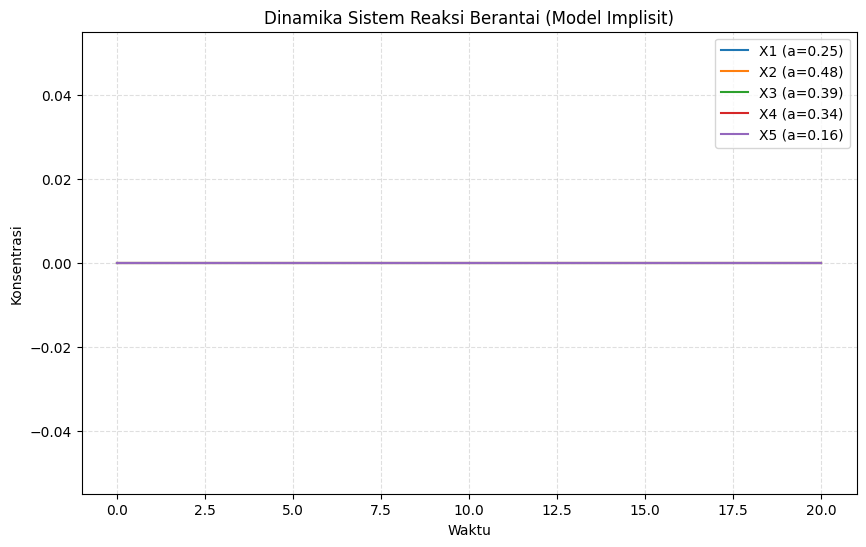

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

def solve_system_serial(N, I, T_max, dt, seed=42):
    """
    Menyelesaikan sistem persamaan diferensial berantai secara implisit.
    Parameter:
        N : jumlah titik spasial
        I : jumlah spesies (tanpa indeks nol)
        T_max : durasi simulasi
        dt : langkah waktu
        seed : untuk reproducibility (optional)
    """
    
    # ---- 1. Set Random Seed Agar Hasil Konsisten ----
    np.random.seed(seed)
    
    # Konstanta reaksi/peluruhan (index 1..I)
    a = np.zeros(I+1)
    a[1:] = np.random.uniform(0.1, 0.5, I)
    
    # Source term (fixed) — hanya untuk X1 pada setengah domain
    S = np.zeros((N, I+1))
    S[:N//2, 1] = 1.0
    
    # Variabel keadaan
    X = np.zeros((N, I+1))
    
    # Perhitungan jumlah langkah waktu
    n_steps = int(T_max / dt)
    
    print(f"Mulai simulasi: N={N}, Spesies={I}, Steps={n_steps}")

    start_time = time.time()

    # Untuk percepatan: simpan denominator sekali saja
    denom = 1.0 + a * dt

    # History: alokasi langsung (lebih cepat)
    save_every = 10  # sampling tiap 10 langkah
    samples = n_steps // save_every + 1
    history_mid = np.zeros((samples, I+1))

    # ---- 2. Loop Waktu ----
    k = 0  # index penyimpanan history
    
    for step in range(n_steps):

        # Update X1
        X[:, 1] = (X[:, 1] + S[:, 1] * dt) / denom[1]

        # Update X2..X(I-1) (coupled implicit ke species sebelumnya)
        for i in range(2, I):
            X[:, i] = (X[:, i] + dt * (S[:, i] + a[i-1] * X[:, i-1])) / denom[i]

        # Update species terakhir (tanpa term -a_i*Xi)
        X[:, I] = X[:, I] + dt * (S[:, I] + a[I-1] * X[:, I-1])
        
        # Simpan history
        if step % save_every == 0:
            history_mid[k] = X[N//2, :].copy()
            k += 1

    runtime = time.time() - start_time
    print(f"Selesai dalam {runtime:.4f} detik.")

    return history_mid, a


# --- Eksekusi Simulasi ---
N_points = 1000
n_species = 5
T_duration = 20.0
delta_t = 0.01

res, params_a = solve_system_serial(N_points, n_species, T_duration, delta_t)

# --- Visualisasi Hasil ---
plt.figure(figsize=(10, 6))
time_axis = np.arange(len(res)) * (delta_t * 10)

for i in range(1, n_species + 1):
    plt.plot(time_axis, res[:, i], label=f'X{i} (a={params_a[i]:.2f})')

plt.title("Dinamika Sistem Reaksi Berantai (Model Implisit)")
plt.xlabel("Waktu")
plt.ylabel("Konsentrasi")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

Simulasi Reaction-Diffusion: N=100, Species=5, Steps=20000
Selesai dalam 1.2002 detik.


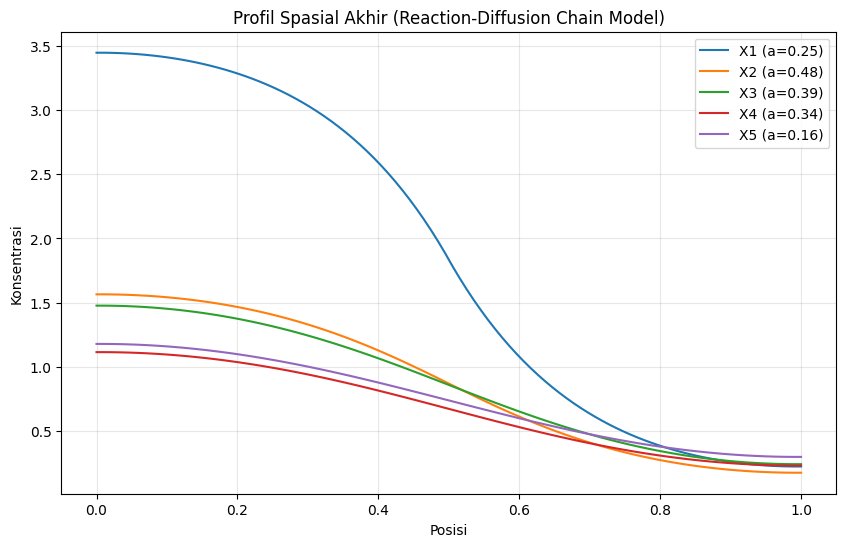

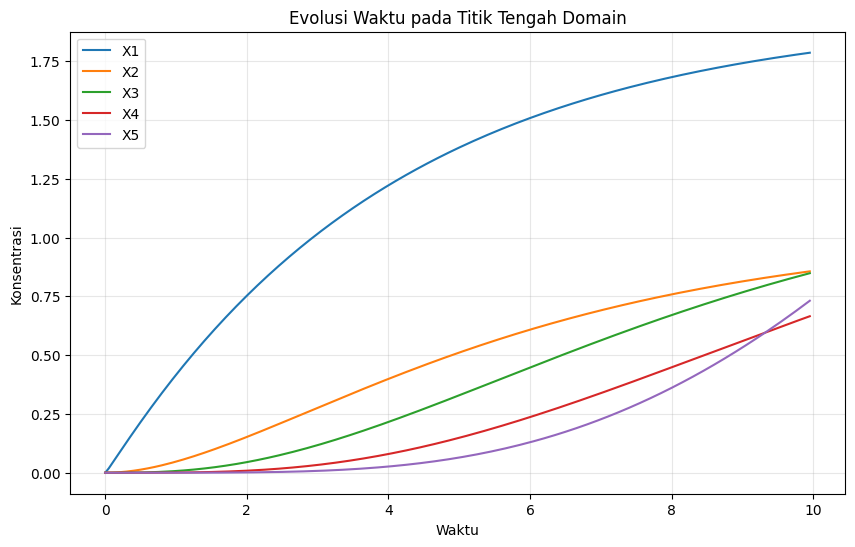

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import time

def simulate_reaction_diffusion(N, I, T_max, dt, D=0.01, seed=42):
    np.random.seed(seed)

    # Grid spatial
    L = 1.0
    dz = L / (N - 1)

    # Konstanta reaksi (index 1..I)
    a = np.zeros(I + 1)
    a[1:] = np.random.uniform(0.1, 0.5, I)

    # Source: hanya pada separuh kiri domain
    S = np.zeros((N, I + 1))
    S[:N//2, 1] = 1.0

    # Variabel keadaan
    X = np.zeros((N, I + 1))

    n_steps = int(T_max / dt)
    print(f"Simulasi Reaction-Diffusion: N={N}, Species={I}, Steps={n_steps}")

    start = time.time()

    save_every = 100
    history = []

    for step in range(n_steps):

        X_new = X.copy()

        for i in range(1, I+1):
            diffusion = np.zeros(N)

            # Laplacian interior points
            diffusion[1:-1] = (X[:, i][2:] - 2*X[:, i][1:-1] + X[:, i][:-2]) / dz**2
            
            # Boundary: Neumann (no flux)
            diffusion[0] = diffusion[1]
            diffusion[-1] = diffusion[-2]

            # Reaction terms
            if i == 1:
                reaction = S[:, i] - a[i] * X[:, i]
            elif i < I:
                reaction = S[:, i] + a[i-1] * X[:, i-1] - a[i] * X[:, i]
            else:  # last species: no decay
                reaction = S[:, i] + a[i-1] * X[:, i-1]

            # Update
            X_new[:, i] = X[:, i] + dt * (D * diffusion + reaction)

        X = X_new

        if step % save_every == 0:
            history.append(X[:, 1:].copy())  # simpan semua species profile

    runtime = time.time() - start
    print(f"Selesai dalam {runtime:.4f} detik.")

    return np.array(history), a, dz


# --- Run Simulation ---
N = 100
I = 5
T = 10.0
dt = 0.0005

history, params_a, dz = simulate_reaction_diffusion(N, I, T, dt)

# --- Plot hasil akhir (spasial) ---
plt.figure(figsize=(10, 6))
x = np.linspace(0, 1, N)

for i in range(I):
    plt.plot(x, history[-1][:, i], label=f'X{i+1} (a={params_a[i+1]:.2f})')

plt.title("Profil Spasial Akhir (Reaction-Diffusion Chain Model)")
plt.xlabel("Posisi")
plt.ylabel("Konsentrasi")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


# --- Plot Time Evolution of midpoint ---
mid = history[:, N//2, :]

plt.figure(figsize=(10, 6))
time_axis = np.arange(len(mid)) * (dt * 100)

for i in range(I):
    plt.plot(time_axis, mid[:, i], label=f'X{i+1}')

plt.title("Evolusi Waktu pada Titik Tengah Domain")
plt.xlabel("Waktu")
plt.ylabel("Konsentrasi")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


In [ ]:
from mpi4py import MPI
import numpy as np
import time

# --- Setup MPI ---
comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

# --- Parameter Global ---
N_global = 100000  # Total titik spasial (Besar agar terasa bedanya)
I = 5              # Jumlah spesies
T_max = 10.0
dt = 0.01

# Pastikan pembagian rata (untuk penyederhanaan kode)
if N_global % size != 0:
    if rank == 0: print("Error: N_global harus habis dibagi jumlah prosesor")
    exit()

# --- 1. Inisialisasi Lokal ---
N_local = N_global // size
n_steps = int(T_max / dt)

# Parameter a_i harus SAMA di semua prosesor
# Rank 0 generate, lalu broadcast
if rank == 0:
    a = np.random.uniform(0.1, 0.5, I + 1)
else:
    a = np.empty(I + 1, dtype=np.float64)

comm.Bcast(a, root=0)

# Array Lokal (X dan S)
X_local = np.zeros((N_local, I + 1))
S_local = np.zeros((N_local, I + 1))

# Setup Source Lokal (Misal S=1 hanya di global index 0 sd N/2)
# Kita perlu tahu offset global kita
global_start_idx = rank * N_local
global_end_idx = global_start_idx + N_local

# Logika source sederhana: Jika index global < N_global/2, set S=1
threshold = N_global // 2
for loc_idx in range(N_local):
    glob_idx = global_start_idx + loc_idx
    if glob_idx < threshold:
        S_local[loc_idx, 1] = 1.0

# Pre-calc denominator
denom = 1.0 + (a * dt)

# --- 2. Loop Waktu Paralel ---
comm.Barrier()
start_time = time.time()

for step in range(n_steps):
    # Logika sama persis dengan serial, tapi hanya pada N_local
    # Tidak ada komunikasi MPI send/recv di sini!
    
    # Spesies 1
    X_local[:, 1] = (X_local[:, 1] + S_local[:, 1] * dt) / denom[1]
    
    # Spesies 2 ... I-1
    for i in range(2, I):
        X_local[:, i] = (X_local[:, i] + dt * (S_local[:, i] + a[i-1] * X_local[:, i-1])) / denom[i]
        
    # Spesies I
    X_local[:, I] = X_local[:, I] + dt * (S_local[:, I] + a[I-1] * X_local[:, I-1])

comm.Barrier()
end_time = time.time()

# --- 3. Pengumpulan Hasil (Gather) ---
# Menggabungkan semua X_local menjadi X_final di Rank 0
# (Hanya perlu dilakukan sekali di akhir)

# Siapkan buffer di Rank 0
if rank == 0:
    X_final = np.empty((N_global, I + 1), dtype=np.float64)
else:
    X_final = None

# Gather data (Perhatikan: Gather mengumpulkan berdasarkan urutan rank)
# Karena array 2D, kita ratakan dulu atau gunakan Gatherv untuk struktur kompleks.
# Untuk simplifikasi array NumPy contiguous, Gather bekerja baik pada blok memori.
comm.Gather(X_local, X_final, root=0)

# --- Output ---
if rank == 0:
    print(f"--- Hasil Paralel MPI ({size} Prosesor) ---")
    print(f"Total Titik N : {N_global}")
    print(f"Waktu Hitung  : {end_time - start_time:.4f} detik")
    
    # Cek Validitas Sederhana
    # Ambil sampel index 0 (ada Source) dan index terakhir (tidak ada Source)
    print(f"Nilai X_{I} di index 0      : {X_final[0, I]:.4f}")
    print(f"Nilai X_{I} di index Akhir  : {X_final[-1, I]:.4f}")